<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone III</font></h2>

<h1><font color="#00586D" size=5>Exploring the movie database</font></h1>
<br><br><br>


<div align="right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>Master in Data Science and Data Engineering in the Cloud</font><br>
<font color="#00586D" size=3>University of Castilla-La Mancha</font>

</div>
<br>

---
<br>

This project is based on a set of data about movies and their ratings available in _Internet Movie Database (IMDB)_. This information has been enriched with additional data obtained through queries to the API of another site, _The Movie Database (TMDB)_. As a result of this process, three data sets have been generated: `df_movies`, with information on movies, genres, and ratings; `df_people`, with information about people; and `df_credits` with information about the people involved in each film (director and three main actors). Based on these, an exploratory analysis will be carried out.
  
The way in which the analysis is developed depends largely_on the available data_and on some_objectives_that can be general, or the answer to specific questions, and that can vary or be expanded depending on the intermediate results that the process produces. This project will start from an initial hypothetical situation in which the conditions for investment in a_relatively low budget_film are studied. To do this, we will analyze which factors have the most impact on the success of a film, which we will consider can be quantified by the income it has obtained, or by the number of votes and rating on_IMDB_. The differences between genres will also be studied in order to select the most suitable ones, and the relevance of directors, actors, and actresses will be analyzed, and which ones could be the most suitable. In addition, and in parallel, some additional information will be obtained that, although it may not be related to the main objective, may be of interest.

To carry out the exploration, a series of exercises will be proposed that consist of obtaining graphs or specific data. Finally, this project does not have to be limited to solving the exercises, but there is the possibility of answering questions other than those proposed in the notebook.



<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> An essential part of exploration is data validation and cleaning. As this part is more "arid", in this project we will focus on the exploration itself. In Capstone V we will see a case in which data preparation is somewhat more complex.
</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Index</font></h2>


*[1. First inspection](#section1)* [1.1 Initial exploration of `df_movies`](#section11)
*[2. Budget](#section2)* [2.1 Budget / income](#section21)
  *[2.2 Release date as a factor of interest](#section22)* [3 Genres](#section3)
*[4 People](#section4)* [4.1 Directors](#section41)
  *[4.2 Cast](#section42)* [5 Low Budget Movies](#section5)
*[6. Conclusion](#section6)

---

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section1"></a>
## <font color="#00586D"> 1. First inspection</font>
<br>

The first step in the exploratory analysis consists of obtaining a first description of the data set as such, which includes aspects such as: files; characteristics, relationships between them, meaning and types of data with which they are represented; existence or frequency of missing values, etc. The header of each of the three *DataFrame* is then read and displayed, and its structure is inspected.


#### `df_movies`

In [2]:
df_movies = pd.read_csv('data/df_movies.csv', index_col='movie_id', sep=';', parse_dates=['release_date'])
display(df_movies.head(2))
df_movies.info()

title                   genres  avg_rating  \
movie_id                                                                      
tt0010323  The Cabinet of Dr. Caligari  Horror,Mystery,Thriller         8.0   
tt0012349                      The Kid      Comedy,Drama,Family         8.3   

           num_votes  budget  revenue release_date original_language  \
movie_id                                                               
tt0010323      64516   18000     8811   1920-02-27                de   
tt0012349     126789  250000  2500000   1921-01-21                en   

           popularity                                           keywords  
movie_id                                                                  
tt0010323      14.790  insane asylum,black and white,cult film,silent...  
tt0012349      14.697  angel,suicide attempt,fistfight,slapstick come...

<class 'pandas.core.frame.DataFrame'>
Index: 3824 entries, tt0010323 to tt9893250
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              3824 non-null   object        
 1   genres             3824 non-null   object        
 2   avg_rating         3824 non-null   float64       
 3   num_votes          3824 non-null   int64         
 4   budget             3824 non-null   int64         
 5   revenue            3824 non-null   int64         
 6   release_date       3824 non-null   datetime64[ns]
 7   original_language  3824 non-null   object        
 8   popularity         3824 non-null   float64       
 9   keywords           3809 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 328.6+ KB


It can be seen that all data types are as expected, and that there is apparently no missing data except in the case of keywords (which will not be used in this project).

#### `df_people`

In [3]:
df_people = pd.read_csv('data/df_people.csv', index_col='people_id', sep=';')
display(df_people.head(2))
df_people.info()

name  popularity    imdb_id  gender
people_id                                                
2991          Robert Wiene       1.886  nm0927468       2
13848      Charlie Chaplin      15.496  nm0000122       2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5791 entries, 2991 to 52775
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5791 non-null   object 
 1   popularity  5791 non-null   float64
 2   imdb_id     5748 non-null   object 
 3   gender      5791 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 226.2+ KB


The data also corresponds to what was expected, and there are missing values ​​for the `imdb_id` column. It is understood that some of the directors/actors do not have an identifier on the `IMDb` platform.

#### `df_credits`

In [4]:
df_credits = pd.read_csv('data/df_credits.csv', sep=';')
display(df_credits.head(2))
df_credits.info()

people_id   movie_id       rol
0       2991  tt0010323  director
1      13848  tt0012349  director

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15606 entries, 0 to 15605
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   people_id  15606 non-null  int64 
 1   movie_id   15606 non-null  object
 2   rol        15606 non-null  object
dtypes: int64(1), object(2)
memory usage: 365.9+ KB


It can be seen that there are no missing values ​​in this set, and that the data coding is correct.


As a consequence of this first approach, it is concluded that it is not necessary to do any type of preprocessing, nor adapt the process to data cleaning, so the exploration will focus on the information.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section11"></a>
### <font color="#00586D"> 1.1 Initial scan of `df_movies` </font>
<br>

The *DataFrame* `df_movies` is the core of the data set, and around which the exploration must be developed. It contains identifying, qualitative, and quantitative information about each film. Firstly, an inspection of the data will be carried out to check if there are extreme values.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 1</font>

Get a description of the numeric columns of the *DataFrame* `df_movies`. In order to observe if there are extreme values ​​and in what proportion, incorporate the quantiles `[0.25, 0.5, 0.75, 0.95, 0.99, 0.995]` into the results.



In [5]:
df_movies.describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99, 0.995])

avg_rating     num_votes        budget       revenue   popularity
count  3824.000000  3.824000e+03  3.824000e+03  3.824000e+03  3824.000000
mean      6.846810  1.948407e+05  4.229992e+07  1.424842e+08    50.848736
std       0.914069  2.245797e+05  4.997971e+07  2.189518e+08   122.146243
min       1.000000  5.003300e+04  0.000000e+00  0.000000e+00     0.600000
25%       6.300000  7.371000e+04  7.000000e+06  2.073692e+07    16.158250
50%       6.900000  1.157800e+05  2.500000e+07  6.827535e+07    24.984000
75%       7.500000  2.192848e+05  6.000000e+07  1.707762e+08    49.250000
95%       8.200000  6.222014e+05  1.500000e+08  5.438717e+08   153.238750
99%       8.500000  1.144504e+06  2.085400e+08  1.047176e+09   373.312660
99.5%     8.700000  1.393663e+06  2.500000e+08  1.242341e+09   689.647770
max       9.300000  2.660316e+06  3.800000e+08  2.920357e+09  4328.431000

<!--comment -->

Something that is observed is that there are films for which the budget and/or collection are zero, which really corresponds to a lost value. Both columns will be treated differently. Since the box office is the factor of most interest, films for which we do not know the box office will be eliminated.

Eliminate films whose revenue value is zero (select those whose revenue is greater than zero).

In [6]:
df_movies = df_movies[df_movies["revenue"]>0]

<!--comment -->

On the other hand, films in which budgets are equal to zero are displayed.

In [7]:
df_movies[df_movies["budget"]==0]

title                      genres  avg_rating  \
movie_id                                                                   
tt0013442              Nosferatu              Fantasy,Horror         7.9   
tt0015648    Battleship Potemkin      Drama,History,Thriller         7.9   
tt0041959          The Third Man  Film-Noir,Mystery,Thriller         8.1   
tt0044741                  Ikiru                       Drama         8.3   
tt0050613        Throne of Blood               Drama,History         8.1   
...                          ...                         ...         ...   
tt9100054      The Lost Daughter                       Drama         6.7   
tt9214832                  Emma.        Comedy,Drama,Romance         6.7   
tt9484998           Palm Springs      Comedy,Fantasy,Mystery         7.4   
tt9620292  Promising Young Woman         Crime,Drama,Mystery         7.5   
tt9731534        The Night House     Horror,Mystery,Thriller         6.5   

           num_votes  budget   revenue release_date original_language  \
movie_id                                                                
tt0013442      98252       0     19054   1922-02-16                de   
tt0015648      58131       0     45100   1925-12-24                ru   
tt0041959     172134       0   1226098   1949-08-31                en   
tt0044741      78807       0     55240   1952-10-09                ja   
tt0050613      52578       0     13422   1957-01-15                ja   
...              ...     ...       ...          ...               ...   
tt9100054      64410       0     14521   2021-12-16                en   
tt9214832      54517       0  25155355   2020-02-13                en   
tt9484998     158905       0    164000   2020-07-10                en   
tt9620292     172013       0  13868965   2020-12-13                en   
tt9731534      53347       0  14590542   2021-07-15                en   

           popularity                                           keywords  
movie_id                                                                  
tt0013442      16.524  germany,transylvania,loss of loved one,shapesh...  
tt0015648      14.994  odessa,baby carriage,cossack,panic,slaughter,m...  
tt0041959      15.798  austria,cemetery,black market,grave,soviet mil...  
tt0044741      15.790  bureaucracy,japan,age difference,office,night ...  
tt0050613       9.985  japan,prophecy,based on novel or book,samurai,...  
...               ...                                                ...  
tt9100054      22.755  mother,based on novel or book,beach,greece,dau...  
tt9214832      28.491  based on novel or book,matchmaking,english cou...  
tt9484998      16.876  time travel,swimming pool,romance,palm springs...  
tt9620292      27.732  ohio,coffee shop,psychopath,horror,sociopath,r...  
tt9731534      24.783  depression,nightmare,widow,forest,grief,grievi...  

[178 rows x 10 columns]

<!--comment -->

In principle, they seem like films that have received a large number of votes, and some of them have achieved great revenue, so they will not be discarded. They will be encoded as *NaN* to treat them appropriately if necessary.

Assign the value *NaN* to the values ​​that are zero in the `df_movies['budget']` column.

In [8]:
df_movies["budget"] = df_movies["budget"].replace([0], [np.nan])

In [9]:
df_movies

title                   genres  avg_rating  \
movie_id                                                                      
tt0010323  The Cabinet of Dr. Caligari  Horror,Mystery,Thriller         8.0   
tt0012349                      The Kid      Comedy,Drama,Family         8.3   
tt0013442                    Nosferatu           Fantasy,Horror         7.9   
tt0015648          Battleship Potemkin   Drama,History,Thriller         7.9   
tt0015864                The Gold Rush   Adventure,Comedy,Drama         8.2   
...                                ...                      ...         ...   
tt9620292        Promising Young Woman      Crime,Drama,Mystery         7.5   
tt9639470           Last Night in Soho     Drama,Horror,Mystery         7.1   
tt9731534              The Night House  Horror,Mystery,Thriller         6.5   
tt9770150                    Nomadland                    Drama         7.3   
tt9784798  Judas and the Black Messiah  Biography,Drama,History         7.4   

           num_votes      budget   revenue release_date original_language  \
movie_id                                                                    
tt0010323      64516     18000.0      8811   1920-02-27                de   
tt0012349     126789    250000.0   2500000   1921-01-21                en   
tt0013442      98252         NaN     19054   1922-02-16                de   
tt0015648      58131         NaN     45100   1925-12-24                ru   
tt0015864     111760    923000.0   4000000   1925-07-12                en   
...              ...         ...       ...          ...               ...   
tt9620292     172013         NaN  13868965   2020-12-13                en   
tt9639470     134957  43000000.0  22957625   2021-10-21                en   
tt9731534      53347         NaN  14590542   2021-07-15                en   
tt9770150     160491   5000000.0  14784114   2020-12-04                en   
tt9784798      79914  26000000.0   6416063   2021-02-12                en   

           popularity                                           keywords  
movie_id                                                                  
tt0010323      14.790  insane asylum,black and white,cult film,silent...  
tt0012349      14.697  angel,suicide attempt,fistfight,slapstick come...  
tt0013442      16.524  germany,transylvania,loss of loved one,shapesh...  
tt0015648      14.994  odessa,baby carriage,cossack,panic,slaughter,m...  
tt0015864      14.983  river,gold,dance,worker,cabin,gold rush,thanks...  
...               ...                                                ...  
tt9620292      27.732  ohio,coffee shop,psychopath,horror,sociopath,r...  
tt9639470      69.686  london, england,go-go dancer,nightmare,time tr...  
tt9731534      24.783  depression,nightmare,widow,forest,grief,grievi...  
tt9770150      24.996  factory worker,based on novel or book,recessio...  
tt9784798      20.523  assassination,chicago, illinois,black panther ...  

[3552 rows x 10 columns]

<!--comment -->

On the other hand, although the ranges of the variables are very wide in some cases, there is an important difference between the **maximum** value of the `popularity` column and the rest. It is therefore necessary to determine if it is an error, or on the contrary there are values ​​out of range, but which must be considered within the study.

Show the 10 rows of `df_movies` with the highest popularity value.

In [10]:
df_movies.sort_values(by=['popularity'], inplace=False, ascending=False)

title                    genres  \
movie_id                                                              
tt6443346                      Black Adam  Action,Adventure,Fantasy   
tt1745960               Top Gun: Maverick              Action,Drama   
tt10648342         Thor: Love and Thunder   Action,Adventure,Comedy   
tt12593682                   Bullet Train    Action,Comedy,Thriller   
tt8041270        Jurassic World: Dominion   Action,Adventure,Sci-Fi   
...                                   ...                       ...   
tt0119567   The Lost World: Jurassic Park   Action,Adventure,Sci-Fi   
tt0163025               Jurassic Park III   Action,Adventure,Sci-Fi   
tt2234155                  The Internship                    Comedy   
tt0095327          Grave of the Fireflies       Animation,Drama,War   
tt0091474                       Manhunter    Crime,Mystery,Thriller   

            avg_rating  num_votes       budget     revenue release_date  \
movie_id                                                                  
tt6443346          7.0     109213  200000000.0   319000000   2022-10-19   
tt1745960          8.4     423820  170000000.0  1482656000   2022-05-24   
tt10648342         6.3     305310  250000000.0   760000000   2022-07-06   
tt12593682         7.3     171979   90000000.0   239260044   2022-07-03   
tt8041270          5.7     147762  165000000.0  1001000000   2022-06-01   
...                ...        ...          ...         ...          ...   
tt0119567          6.5     418506   73000000.0   618638999   1997-05-23   
tt0163025          5.9     323287   93000000.0   368780809   2001-07-18   
tt2234155          6.3     205372   58000000.0    44000000   2013-06-07   
tt0095327          8.5     276296    3700000.0      516962   1988-04-16   
tt0091474          7.2      74280   15000000.0     8620929   1986-08-14   

           original_language  popularity  \
movie_id                                   
tt6443346                 en    4328.431   
tt1745960                 en    1491.786   
tt10648342                en    1404.107   
tt12593682                en    1339.013   
tt8041270                 en    1267.666   
...                      ...         ...   
tt0119567                 en       2.446   
tt0163025                 en       2.422   
tt2234155                 en       1.335   
tt0095327                 ja       0.600   
tt0091474                 en       0.600   

                                                     keywords  
movie_id                                                       
tt6443346   lightning,anti hero,superhero,based on comic,d...  
tt1745960   fighter pilot,u.s. navy,sequel,nuclear weapons...  
tt10648342  ex-girlfriend,hero,greek mythology,sequel,supe...  
tt12593682  japan,assassin,based on novel or book,mission,...  
tt8041270   giant monster,dinosaur,child kidnapping,jurass...  
...                                                       ...  
tt0119567   exotic island,dna,paleontology,tyrannosaurus r...  
tt0163025   exotic island,dna,paleontology,tyrannosaurus r...  
tt2234155   mattress shop,job interview,rivalry,loss of jo...  
tt0095327   sibling relationship,hunger,world war ii,shelt...  
tt0091474   loss of loved one,journalist,fbi,covered inves...  

[3552 rows x 10 columns]

<!--comment -->

Visualizing the data allows us to intuit that most of the films for which the value of the `popularity` column is extremely high, are well-known and high-budget. A phenomenon also draws attention, and that is that a large part of them were released last year or this year. This leads us to wonder if the indicator could be related to greater activity on the website as a result of the increasingly intensive use of social networks; or as in the case of other platforms (*Spotify*, for example) it is a variable indicator that reflects interest at the current moment. This circumstance can be verified by showing the average popularity of films per year.


There are several ways to show the relationship between popularity and release date, one of them is using a bar graph. However, it is not the most convenient because a period of almost 100 years is being contemplated and it would be more difficult to identify trends. Draw a graph of type `sns.lineplot()` that shows the average popularity by year.



<AxesSubplot: xlabel='release_date', ylabel='popularity'>

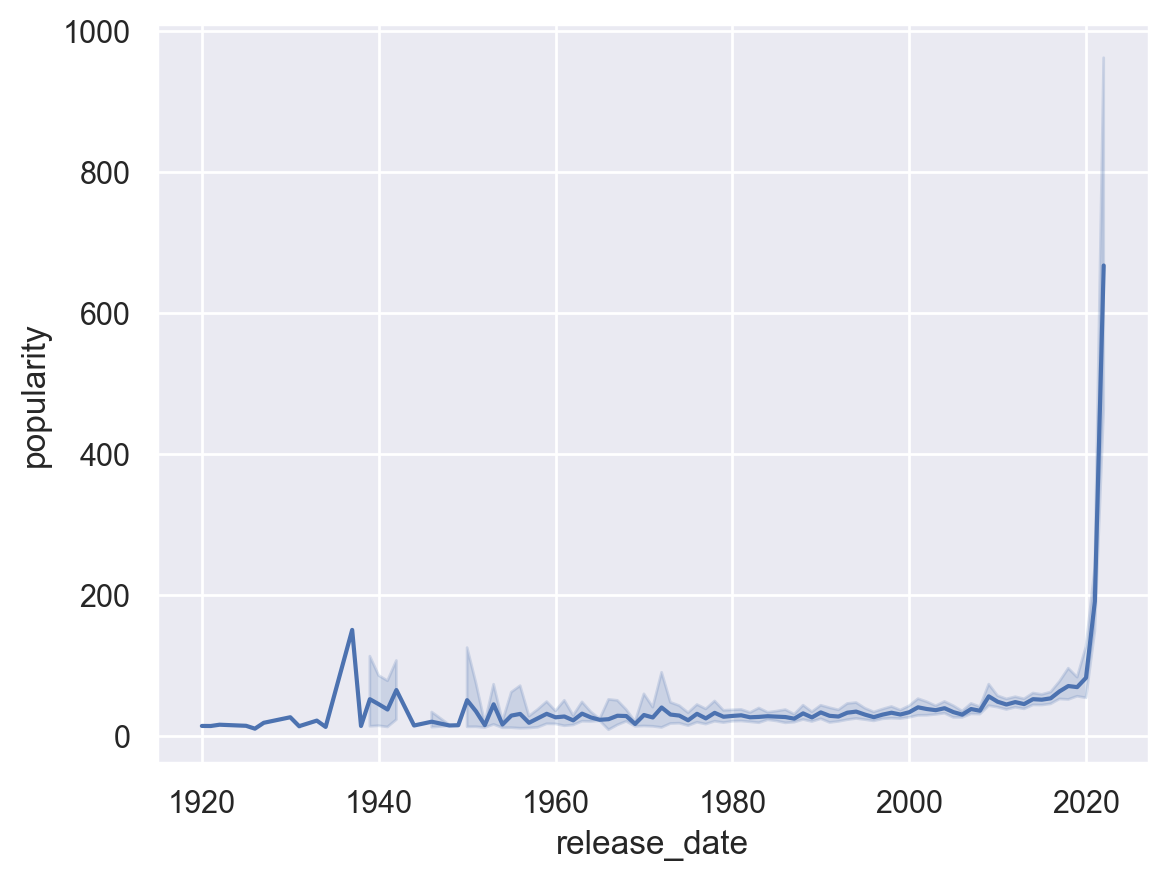

In [11]:
sns.lineplot(data = df_movies, x = df_movies["release_date"].dt.year, y = "popularity")

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Indeed, it is shown that the popularity of films grows with the release date, and that there is a dramatic increase starting in 2020, with the average for the last year being around 650. This circumstance is important since it must be monitored. the treatment that is done with the values ​​of the `popularity` column.

In addition to `popularity`, the *DataFrame* `df_movies` includes variables directly related to ***_success_***, which is the main goal of the analysis. As a starting point, the variables `avg_rating`, `num_votes`, `revenue`, and `popularity`, as well as the relationships between them, will be displayed. There are several ways to do this, but *seaborn* allows you to display all the information in a single graph.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 2</font>

Generate a figure with a matrix of graphs in which a scatter graph is shown for each pair of variables (among the four mentioned); and for each variable, a histogram. This figure can be done easily using `seaborn.pairplot()` or `seaborn.PairGrid()`. Because the data set contains information on almost 4000 movies, it is necessary to make some adjustments to the scatterplots, such as using a reduced size or transparency for the marks.




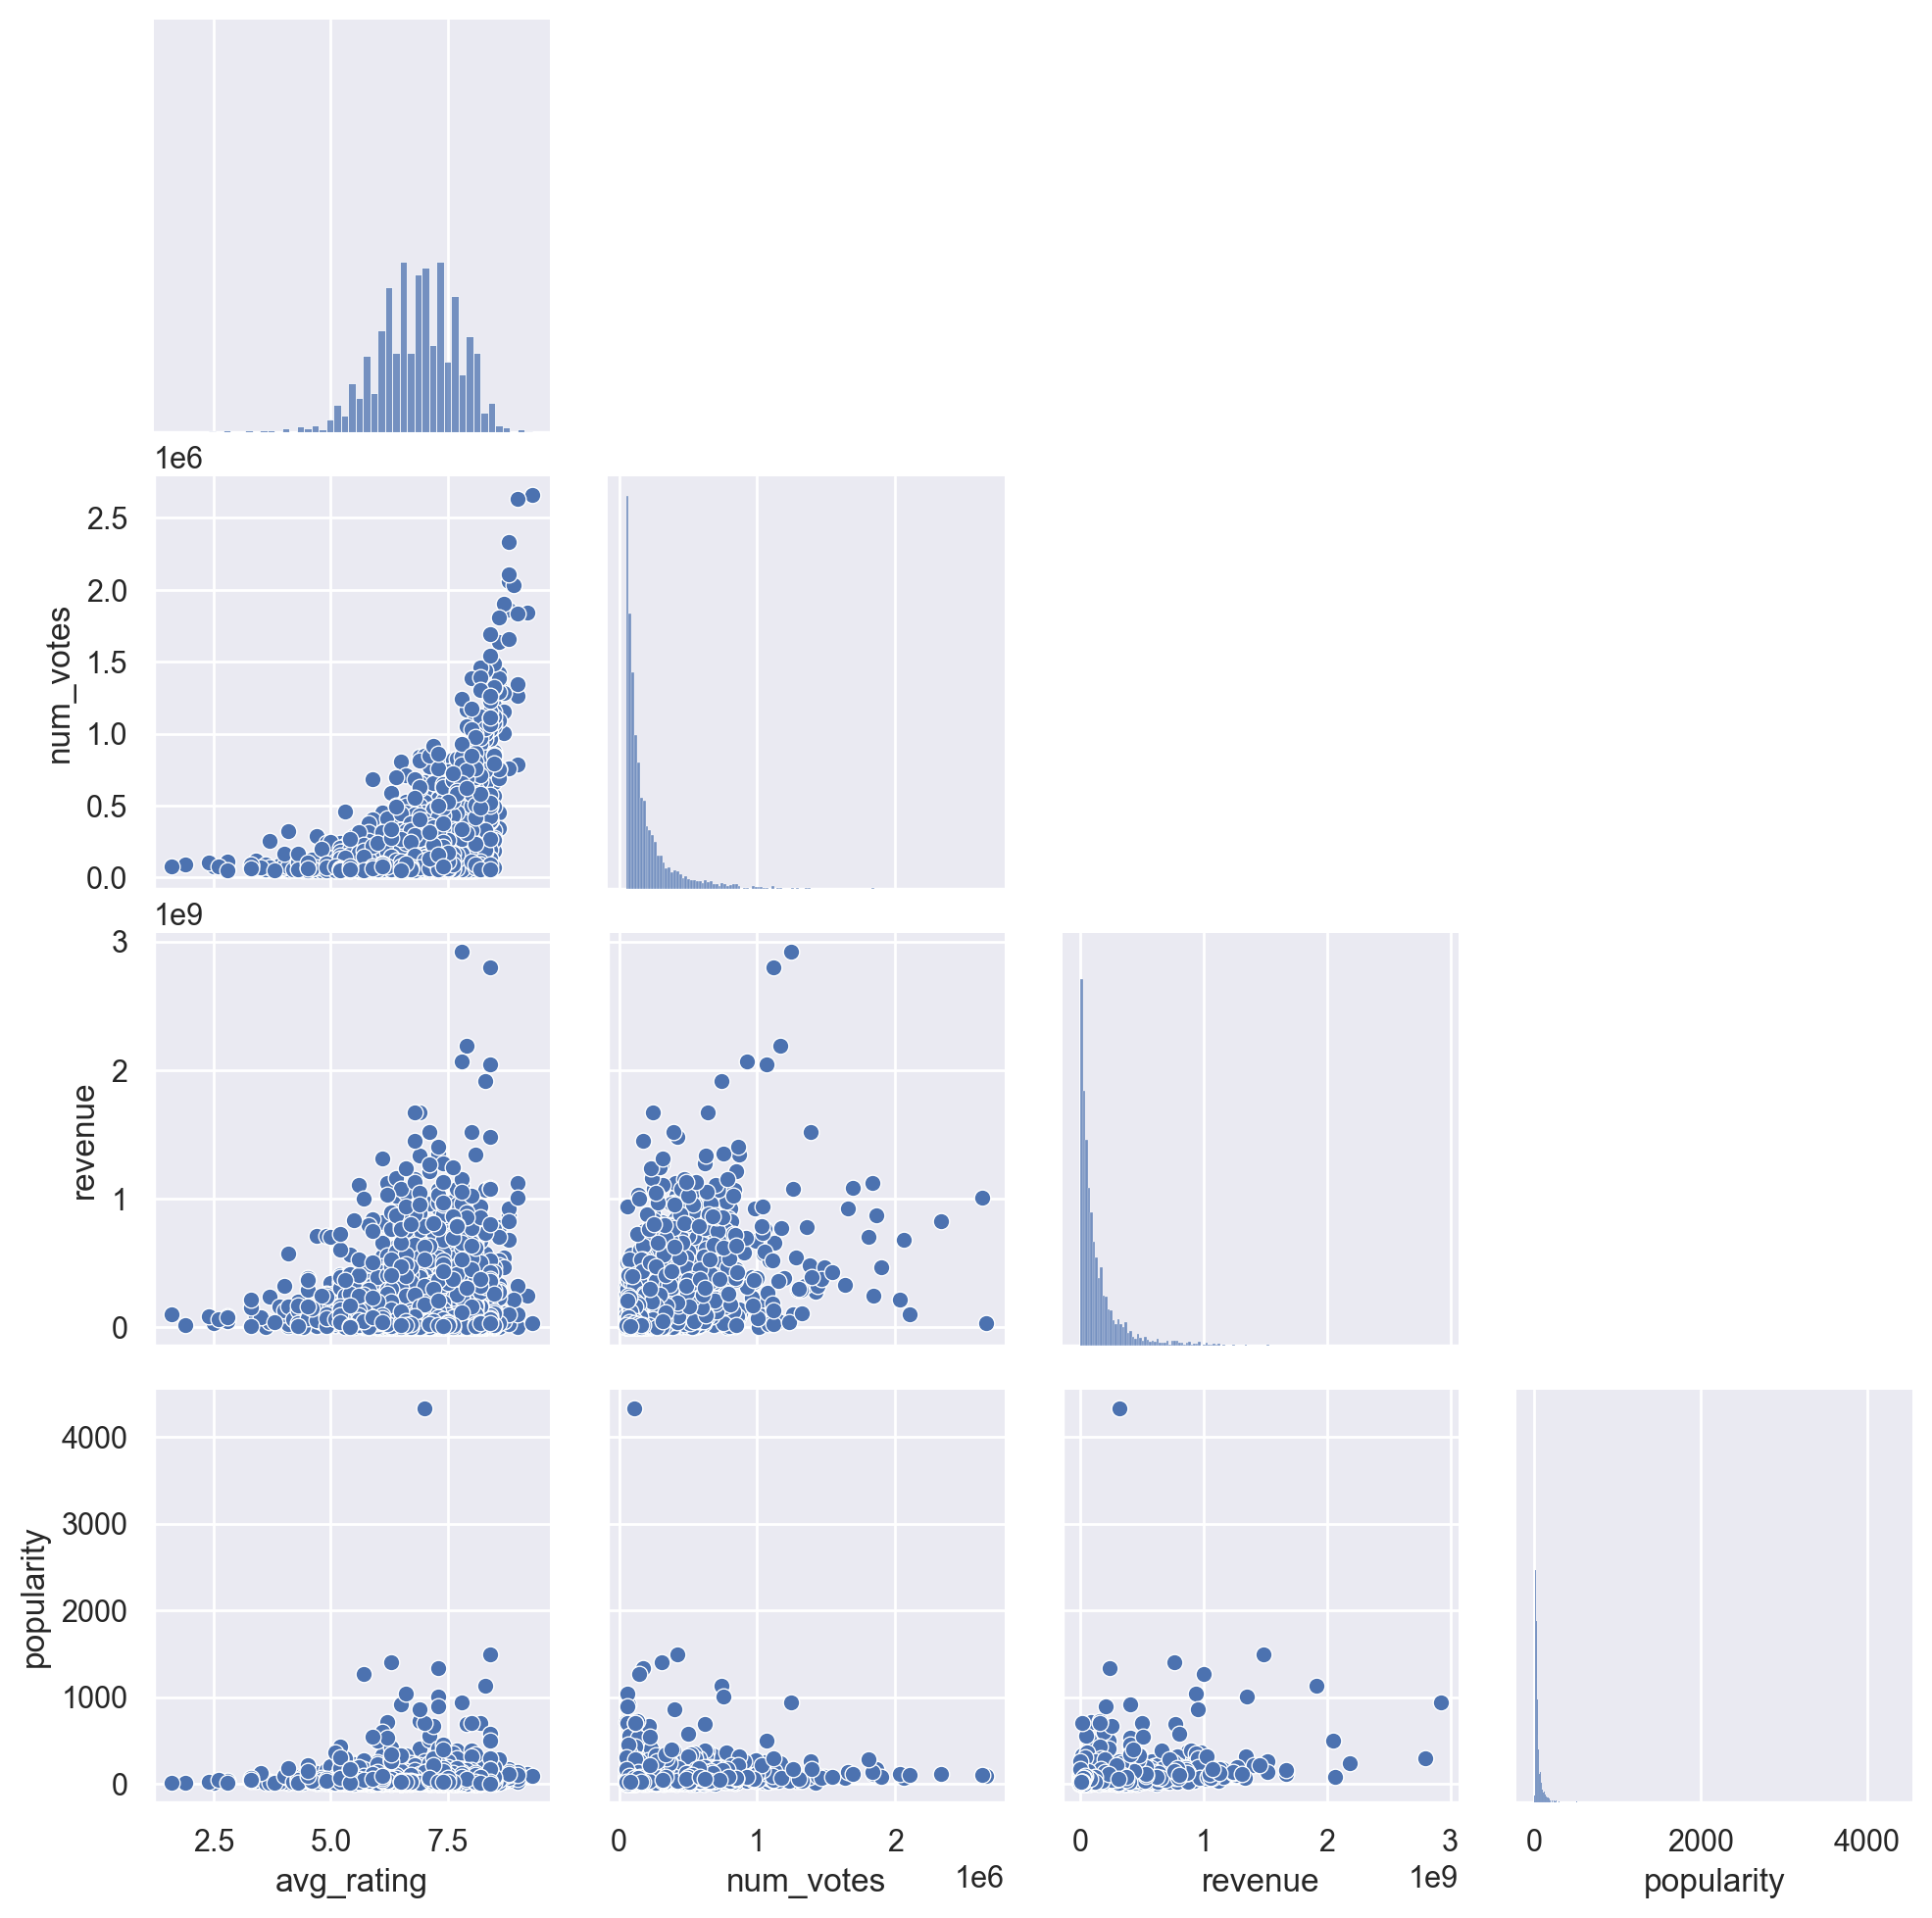

In [12]:
success_meas = ['avg_rating','num_votes', 'revenue', 'popularity'] # Columnas relativas a la valoración

plots = sns.PairGrid(df_movies[success_meas], corner=True, hue_kws={'scatter_kws': {'alpha': 0.5}})
plots.map_diag(sns.histplot)
plots.map_offdiag(sns.scatterplot)

<!--comment -->

The graph above shows that the values ​​of some variables (`num_votes`, `revenue`, and `popularity`) are highly skewed, so that most fall in the lower part of the range. Even so, there is a certain relationship between `avg_rating` and `num_votes`, since it seems that people tend to vote more for the movies they like. A similar, although less strong, relationship is also perceived between `avg_rating` and `revenue`.



Although a priori it does not seem convenient to eliminate movies with high `popularity` values, the _outliers_ make it difficult to see both the corresponding histogram and the scatter plots. Therefore, the graph must be repeated, but discarding the films in which `popularity` takes an extremely high value. It has previously been seen that, although popularity grows sharply, the average in the last year is slightly above 650. Also that the difference grows dramatically from the 0.995 quantile. Therefore, this value will be stored in the variable `pop_outlier_thresh`, and will be used as a threshold.

In [13]:
pop_outlier_thresh = df_movies['popularity'].quantile(0.995)
pop_outlier_thresh

673.0064899999971

Repeat the graph created in exercise one, but discarding the rows corresponding to `popularity` values ​​greater than `pop_outlier_thresh` (without eliminating them from the *DataFrame* `df_movies `).



<AxesSubplot: xlabel='release_date', ylabel='popularity'>

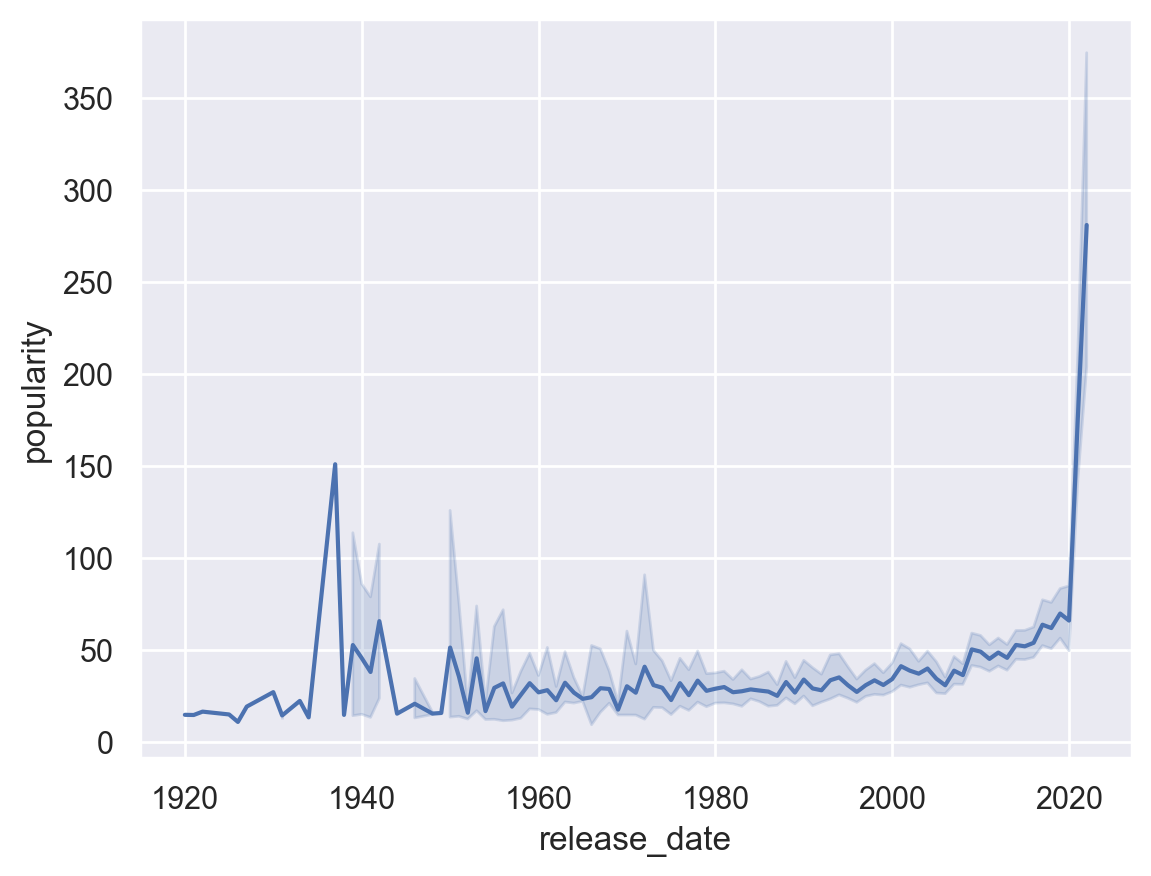

In [14]:
descarte_df = df_movies[df_movies['popularity']<pop_outlier_thresh]
sns.lineplot(data = descarte_df, x = descarte_df["release_date"].dt.year, y = "popularity")

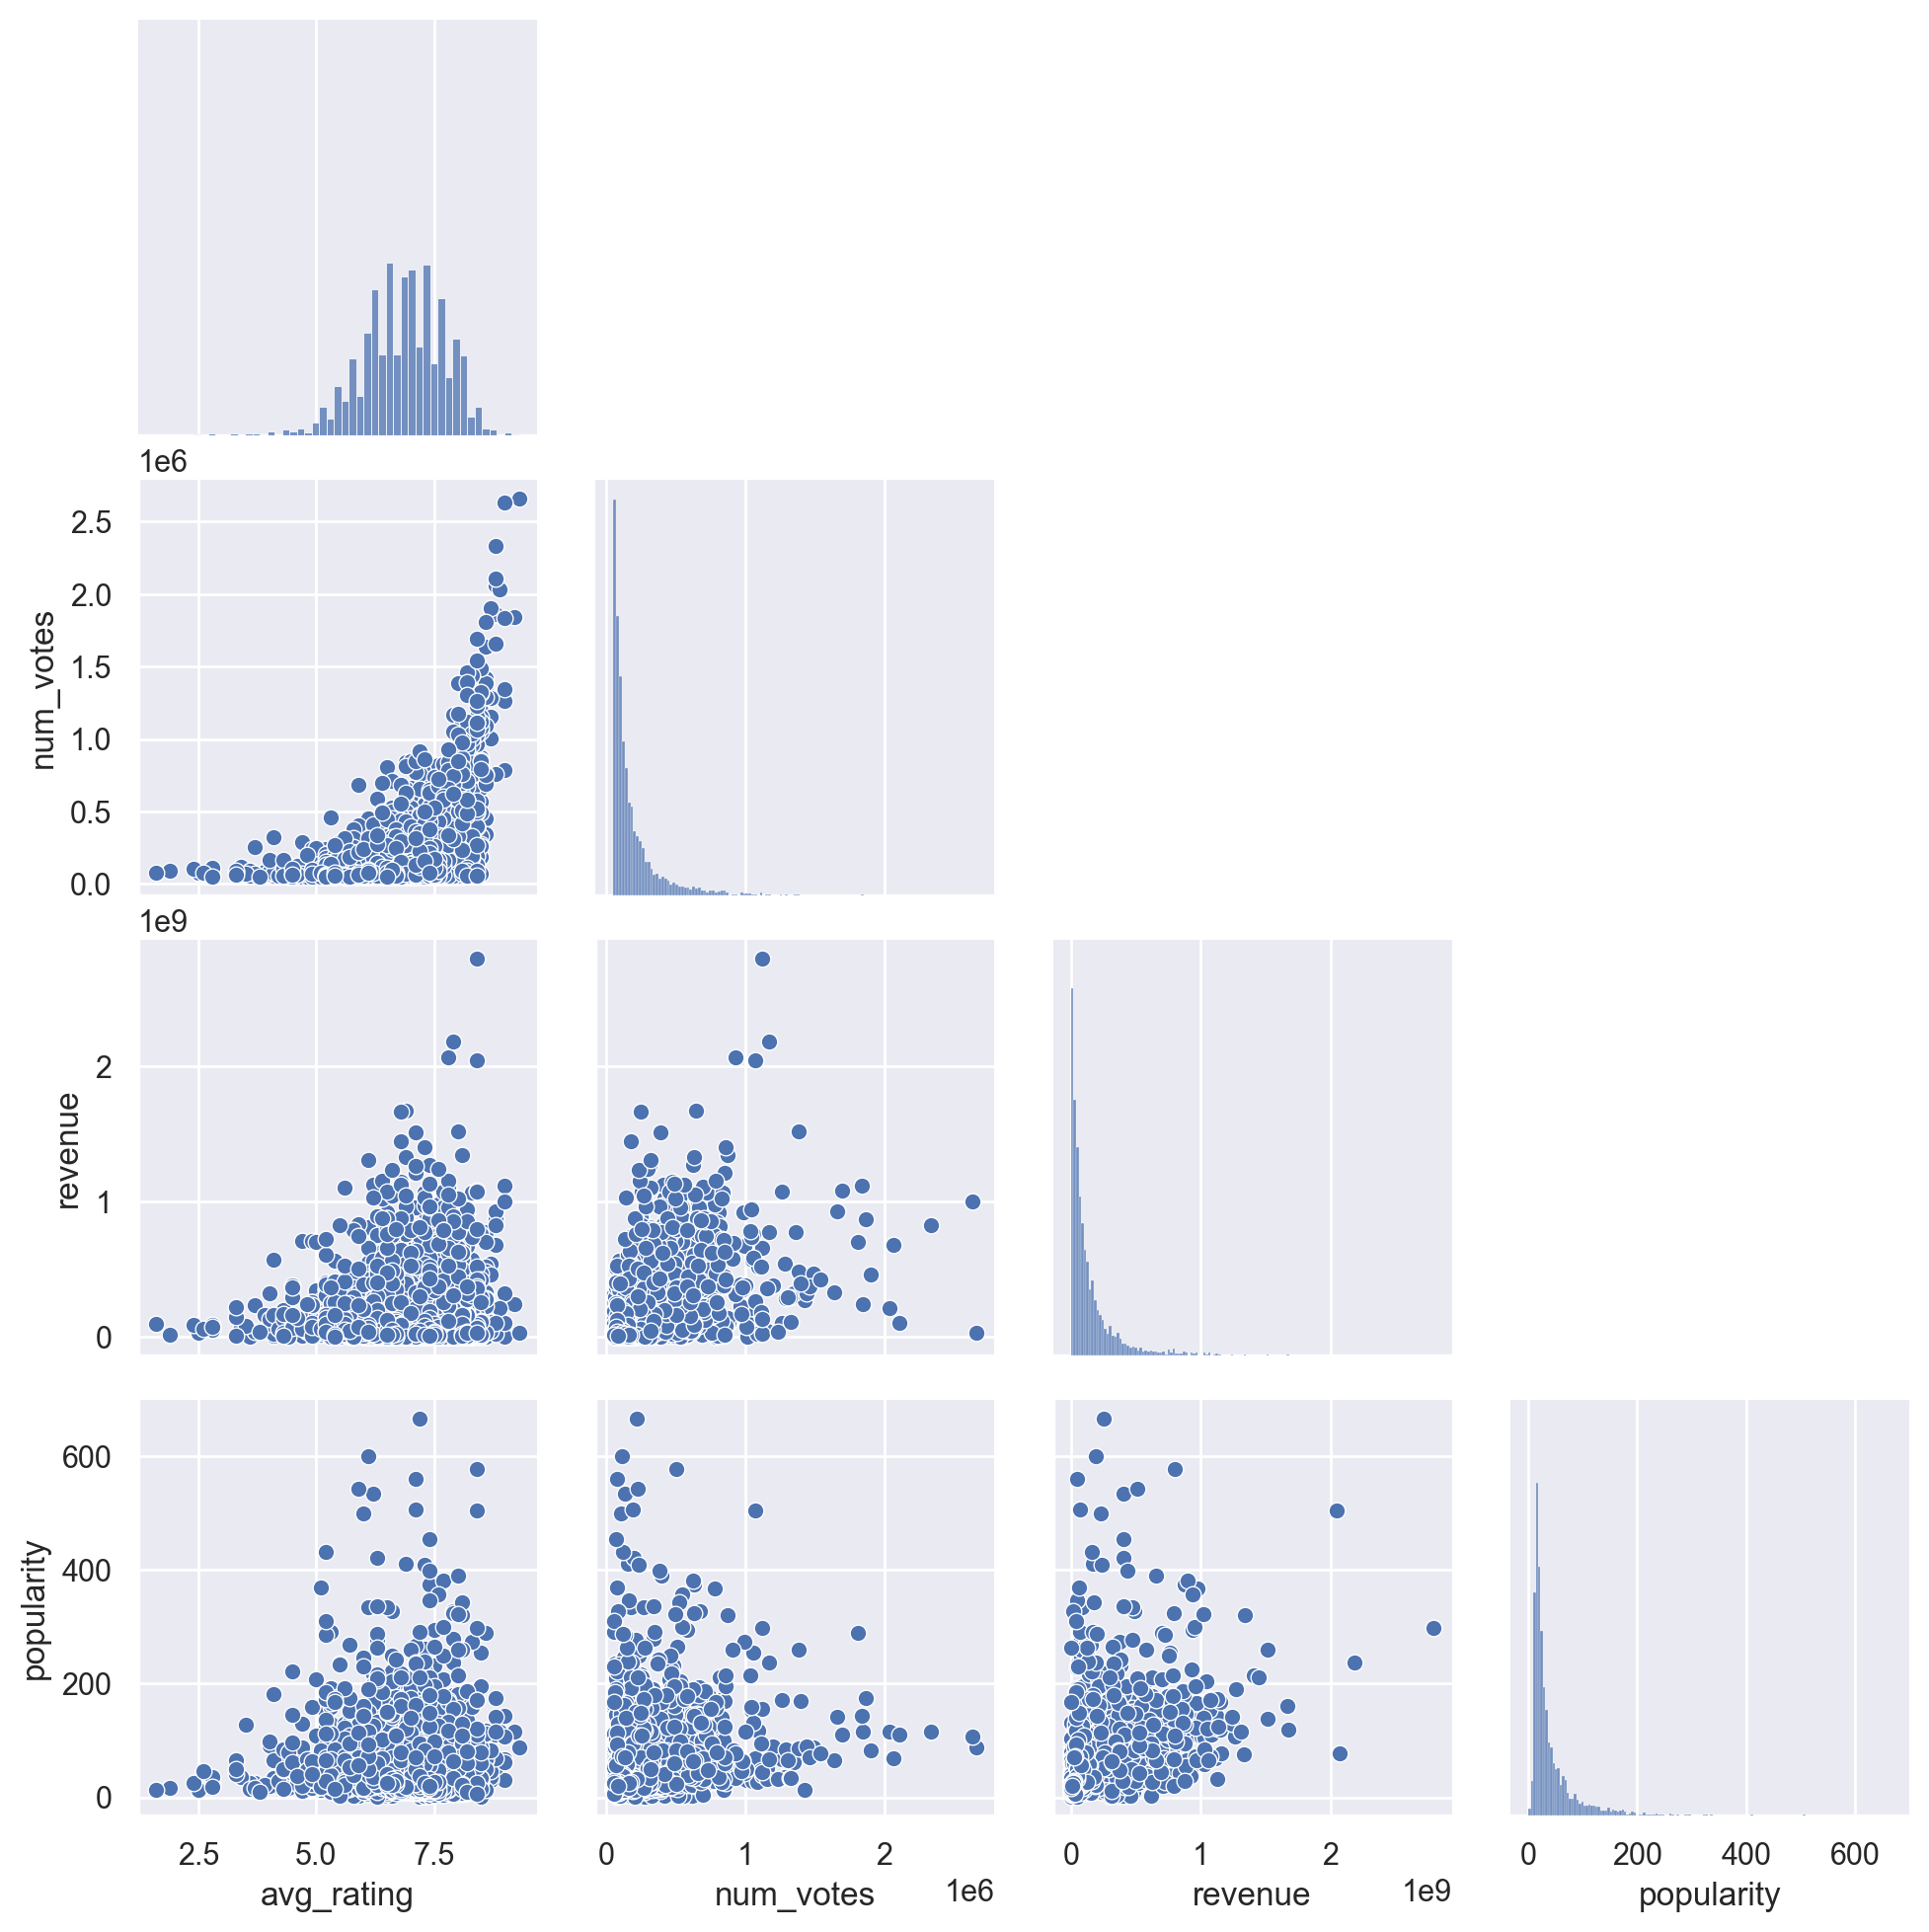

In [15]:
success_meas = ['avg_rating','num_votes', 'revenue', 'popularity'] # Columnas relativas a la valoración

plots = sns.PairGrid(descarte_df[success_meas], corner=True,  hue_kws={'scatter_kws': {'s':5, 'alpha':0.2}})
plots.map_diag(sns.histplot)
plots.map_offdiag(sns.scatterplot)

<!--comment -->

Discarding the *outliers* now allows you to see all the graphs clearly. It seems that `num_votes`, and to a greater extent `revenue` bear a slight relationship with `popularity`. It can also be seen that `avg_rating` behaves differently, and that the relationship with `popularity` is practically nil. In any case, due to the large number of points, and although some trends can be intuited, it is difficult to make a clear assessment. In this case, the correlation coefficient between the variables can provide a more accurate view.

Obtain the correlation coefficient between the variable pairs. Repeat the operation for the data with and without _outliers_ (in `popularity`) and compare.




Show the correlation including the *outliers*.

In [16]:
df_movies[success_meas].corr().style.background_gradient()

<!--comment -->

Shows the correlation by discarding *outliers* based on the `pop_outlier_thresh` value.

In [17]:
descarte_df[success_meas].corr().style.background_gradient()

<!--comment -->

Furthermore, it is considered that the budget of the films ('budget') could have a definitive impact on their dissemination and, therefore, their success. For this reason, its relationship with some of the previous variables will be studied.

Obtain the correlation of `budget` with the variables `avg_rating`, `num_votes`, `revenue`, and `popularity`.





In [18]:
success_meas.append('budget')

df_movies[success_meas].corr().style.background_gradient()

Indeed, the budget has a relatively high correlation with income, despite not having it (it is even slightly negative) with valuations. This reflects the importance of promotion. Also that ratings tend to be lower (very slightly) for high-budget films (do audiences demand more?).

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<br>
The data obtained show some factors of interest:

*When all films are considered, the highest correlation is between the number of votes (`num_votes`) and the film's revenue (`revenue`), which is expected: the more people see a film, more people tend to vote for it. The correlation between the movie's rating (`avg_rating`) and revenue (`revenue`) is zero. This suggests that people go to see the movies because of the promotion and the expectations they raise, regardless of the reviews or ratings.* If the _outliers_ of `popularity` are removed, the relationship between this variable and the others changes slightly. Specifically, popularity (`popularity`) seems somewhat more strongly related to income (`revenue`). This could well be due to the fact that the popularity of the new releases is greater, while the collection is lower due to having been at the box office for less time. By discarding them, this phenomenon does not affect as much.


*The rating (`avg_rating`) has some positive relationship with the number of votes (`num_votes`). It seems that people tend to vote to express a positive evaluation.* The budget (`budget`) is closely related to the profit (`revenue`).

At this point, and considering the initial objective of the study, we will focus mainly on the 'revenue' variable to measure the impact of the film (it is proportional to the people who have seen it), although in some cases the evaluation will also be studied. and number of votes.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#00586D"> 2. Budget</font>
<br>



<a id="section21"></a>
### <font color="#00586D"> 2.1 Budget / income </font>
<br>

Previous data showed that the correlation between budget and revenue is positive. It is possible to study this relationship in more detail. An interesting resource in this sense is a graph of type `sns.joinplot()`, which draws a scatter plot of the two variables, the marginal distribution of each of them and, through the parameter `kind='reg'` You can add the corresponding line to a regression model.



#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 3</font>



Construct and analyze a `sns.joinplot()` plot with a regression line between the variables `budget` and `revenue`.



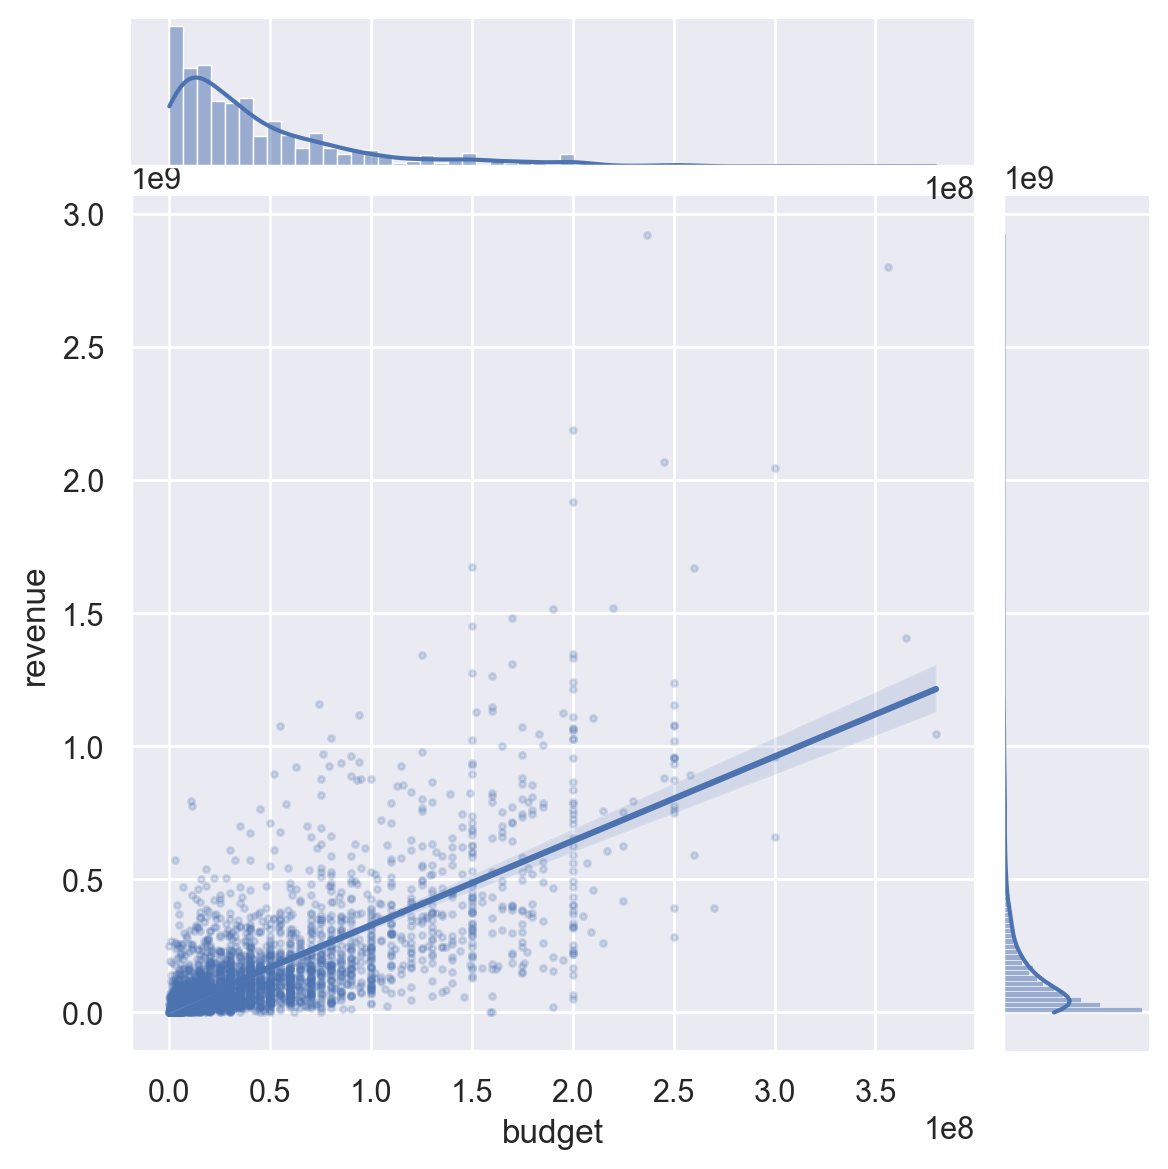

In [19]:
sns.jointplot(data = df_movies, x = "budget", y = "revenue", kind='reg', scatter_kws={'s':5, 'alpha':0.2})

<!--comment -->

There is a certain linear relationship between `budget` and `revenue`. However, the graph does not allow us to determine whether this relationship is significant.


Estimate a linear regression model with `statsmodels` and display the results. What value does $R^2$ have? What does it mean? Can it be stated that there is a relationship between budget and profit? Because?



In [20]:
import statsmodels.api as sm

Y = df_movies["budget"]
X = df_movies["revenue"]

X = sm.add_constant(X)

model = sm.OLS(Y, X, missing='drop')
results = model.fit()

#results.summary()

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 budget   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     3357.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:13:50   Log-Likelihood:                -63477.
No. Observations:                3374   AIC:                         1.270e+05
Df Residuals:                    3372   BIC:                         1.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.183e+07   7.56e+05     28.888      0.000    2.03e+07    2.33e+07
revenue        0.1575      0.003     57.942      0.000       0.152       0.163
==============================================================================
Omnibus:                      772.200   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3163.138
Skew:                           1.067   Prob(JB):                         0.00
Kurtosis:                       7.237   Cond. No.                     3.40e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<!--comment -->

R^2 is the coefficient of determination and has a value of 0.49. This value means that the model explains 49% of the variable y, which would mean that this model can explain a sufficient percentage of the variance y and therefore we could affirm that there is a relationship between the budget and the profit (the value of R^2 in this case it is not too high, but it may be a sufficient percentage to explain the variance). This is explained by the P-value, which is 0, since if we make a hypothesis where H0 is that B1=0 and R^2=0, the P-value is 0, that is, the probability that we obtain a value of R^2=0 is 0 and therefore, there is little probability that there is no relationship between x and y is 0.


<br><br><br>

<!--comment -->

Although the model establishes that there is a linear relationship, it can be seen that it is conditioned by the extreme values ​​of `revenue`. Furthermore it seems that the variance in this variable increases when `budget` does.



Check this circumstance with a graph of type `sns.residplot()`.

<AxesSubplot: xlabel='budget', ylabel='revenue'>

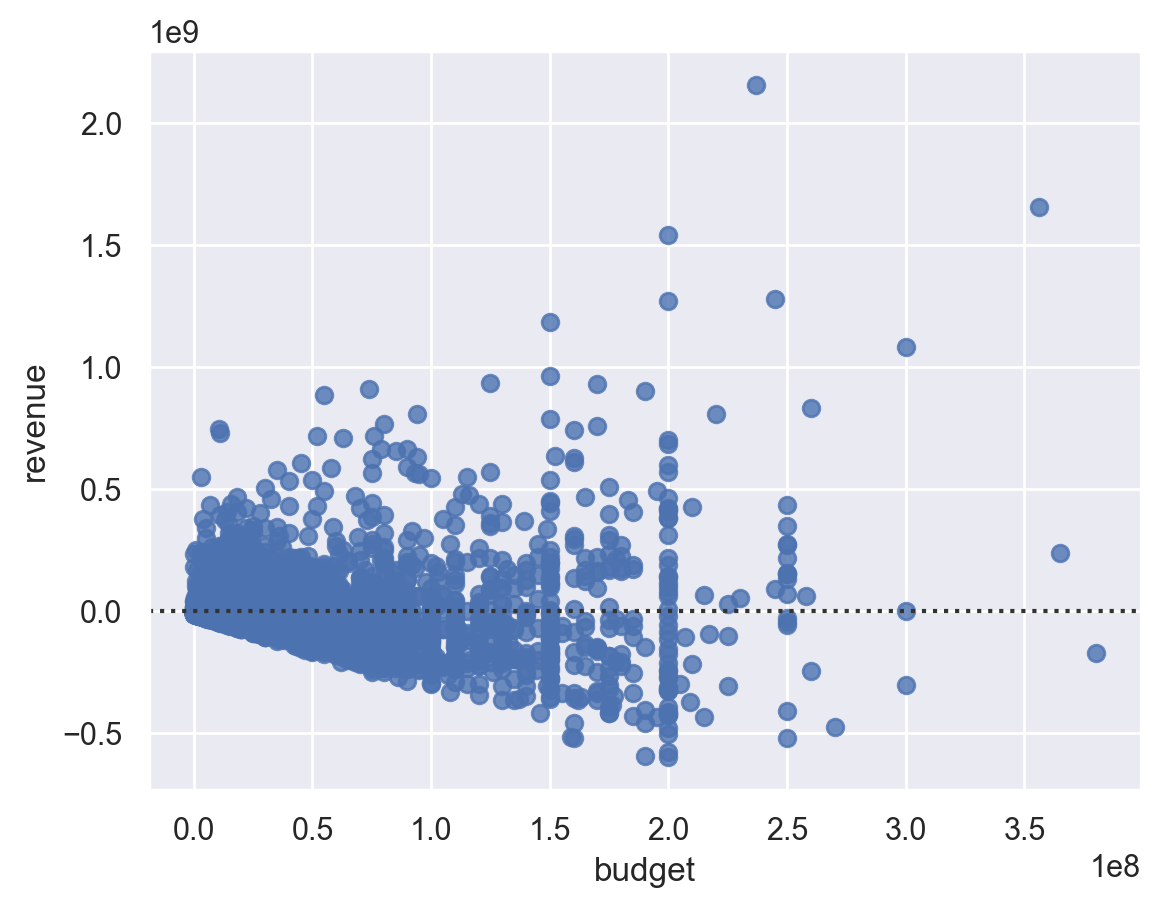

In [22]:
sns.residplot(data = df_movies, x = "budget", y = "revenue")

<!--comment -->

Indeed, the variance of `revenue` increases as `budget` increases, that is, the condition of homoscedasticity is not met, so the confidence intervals and p-values ​​associated with the regression model are not valid statistics although they do allow us to intuit the relationship between the variables.

On the other hand, it is striking that there are several points that clearly break the trends, since there are several films that obtained income significantly above the others, along with some failures that, despite the high budget, did not generate the expected income.

Obtain the information (title, budget and release date) related to the five films with the highest budget.

<br>

<details>
<summary>
    <font size=3 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i></font>
</summary>
    
*There is a method that allows you to obtain*directly*the*n* largest elements given a column.
</details>

In [23]:
df_movies.nlargest(5, columns = "budget")[["title","budget","release_date"]]

title       budget  \
movie_id                                                              
tt1298650  Pirates of the Caribbean: On Stranger Tides  380000000.0   
tt2395427                      Avengers: Age of Ultron  365000000.0   
tt4154796                            Avengers: Endgame  356000000.0   
tt0449088     Pirates of the Caribbean: At World's End  300000000.0   
tt0974015                               Justice League  300000000.0   

          release_date  
movie_id                
tt1298650   2011-05-14  
tt2395427   2015-04-22  
tt4154796   2019-04-24  
tt0449088   2007-05-19  
tt0974015   2017-11-15

<!--comment -->

Obtain the information (title, income and release date) related to the ten films with the most income.



In [24]:
df_movies.nlargest(5, columns = "revenue")[["title","revenue","release_date"]]

title     revenue release_date
movie_id                                                                      
tt0499549                                      Avatar  2920357254   2009-12-15
tt4154796                           Avengers: Endgame  2797800564   2019-04-24
tt0120338                                     Titanic  2187463944   1997-11-18
tt2488496  Star Wars: Episode VII - The Force Awakens  2068223624   2015-12-15
tt4154756                      Avengers: Infinity War  2046239637   2018-04-25

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

There are some films in the top five that don't appear in the top ten.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section22"></a>
### <font color="#00586D"> 2.2 The release date as a factor of interest </font>
<br>

Although the correlation between budget and income corresponds to what can be expected (more budget also implies more advertising), it must be considered that both factors depend strongly on the year of release, since data that corresponds to different periods are being handled. To get an idea of ​​the importance of this factor, it is necessary to visualize how both quantities evolve over the years.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 4</font>

Group the films based on the year of release, and calculate the average budget and income for each group. To do this, the `DataFrame.groupby()` function will be used, and the result (the average for `budget` and for `revenue` for each year) will be stored in a *DataFrame* that will be called `df _bud_rev_year`.




In [25]:
df_bud_rev_year = df_movies.dropna().groupby(df_movies['release_date'].dt.year)["budget","revenue"].mean()

C:\Users\laura\AppData\Local\Temp\ipykernel_10924\1462556199.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bud_rev_year = df_movies.dropna().groupby(df_movies['release_date'].dt.year)["budget","revenue"].mean()


<!--comment -->

Draw the graph based on the information (two columns) contained in the `DataFrame` `df_bud_rev_year`.
 
 


<AxesSubplot: xlabel='release_date'>

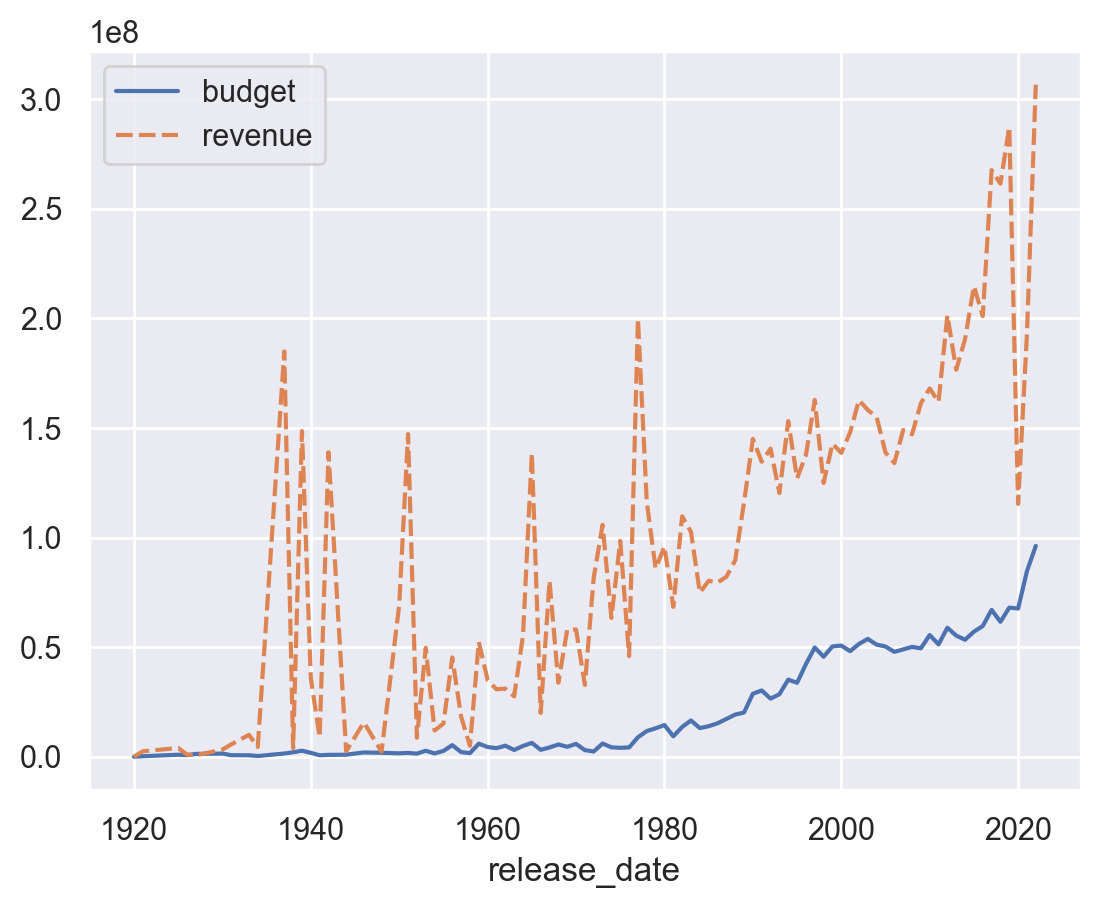

In [26]:
sns.lineplot(df_bud_rev_year)

<!--comment -->

Several phenomena can be visualized in the graph:
* Both budgets and profits grow every year.
* The profit line is more irregular than the budget line.
* Profits seem to grow more than budgets, especially in recent years.
* Profits fell dramatically the first year of the pandemic.
* Six important anomalies can be seen prior to 1980, in which average incomes are seen to be widely separated from the trend.

Get the years to which these entries correspond. To do this, the 6 highest values ​​prior to 1980 can be obtained in the _DataFrame_ `df_bud_rev_year`.



In [27]:
df_bud_rev_year[df_bud_rev_year.index < 1980].nlargest(6, columns = "revenue")

budget       revenue
release_date                         
1977          8900000.0  1.998660e+08
1937          1488423.0  1.849255e+08
1939          2759000.0  1.485692e+08
1951          1748750.0  1.472125e+08
1942           868000.0  1.389548e+08
1965          6325000.0  1.385671e+08

<!--comment -->

In 1937, 1939, 1942, 1951, 1965 and 1977 the most important alterations of the series occurred.

Extract the movie data corresponding to these years and store it in a _DataFrame_ called `df_anomalies`. Draw a horizontal bar graph with the revenue from each movie. The labels on the 'y' axis must contain the title of the film and, in parentheses, the year of release.



In [28]:
df_anomalies = df_movies[(df_movies['release_date'].dt.year).isin([1937, 1939, 1942, 1951, 1965, 1977])]

In [29]:
df_anomalies["titledate"] = df_anomalies["title"].astype(str) + " " + "(" +df_anomalies["release_date"].astype(str) + ")"

C:\Users\laura\AppData\Local\Temp\ipykernel_10924\3037489094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anomalies["titledate"] = df_anomalies["title"].astype(str) + " " + "(" +df_anomalies["release_date"].astype(str) + ")"


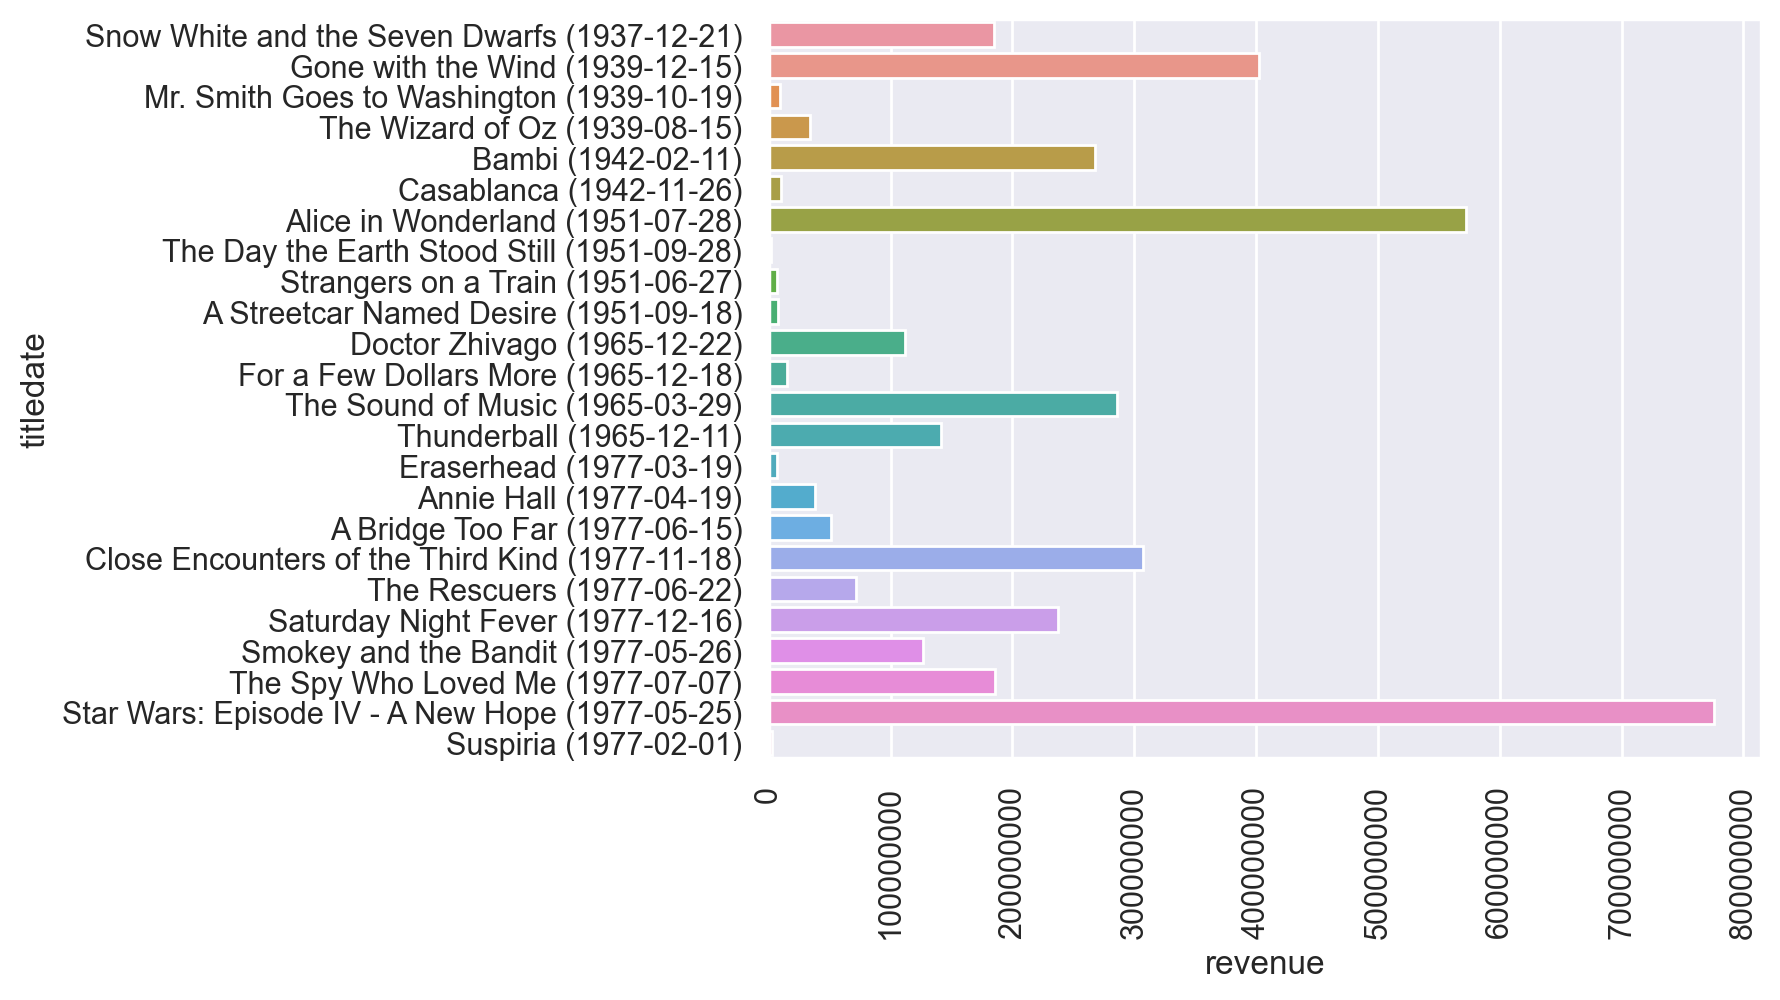

In [30]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter


ax = sns.barplot(df_anomalies, x = "revenue", y = "titledate")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.tick_params(axis='x', rotation=90)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Puede apreciarse que estas anomalías se deben a películas concretas como "_Gone with the wind_" ("Lo que el viento se llevó"), "_Alice in Wonderland_" ("Alicia en el país de las maravillas") y, sobre todo, "_Star Wars_". También hay otras como "_Close Encounters with the Third Kind"_ ("Encuentros en la tercera fase"), o algunas otras de animación como "Bambi" y "_Snow White and the Seven Dwarfs_" ("Blancanieves y los siete enanitos").

It can be seen that these anomalies are due to specific films such as "_Gone with the wind_", "_Alice in Wonderland_" Wonderland") and, above all, "_Star Wars_". There are also others like "_Close Encounters with the Third Kind"_, or some other animated ones like "Bambi" and "Snow White and the Seven Dwarfs" ("Snow White and the Seven Dwarfs").

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


### <font color="#00586D"> Conclusion</font>
<br>

As a summary so far it can be established that, indeed, the budget is closely related to income. With respect to the assessment, however, it had been seen in the previous section that there does not seem to be a relevant relationship, which constitutes the finding that, a priori, could be contrary to our intuition.

In addition, there is a _latent_ variable that determines income: the release date. To study the impact of other factors, it is necessary to take this circumstance into account. There are several possibilities.

*Correct income and profit based on the year, eliminating the effect of the trend.* Study different periods of time separately.
*Do the study for specific budget bands.* Calculate the percentage or ratio of income with respect to the budget.

Due to this, and the objective of the study (production of a relatively low budget film), more current films will be considered. Furthermore, from the year 2000 onwards it has been observed that the growth of the budget is somewhat slower, which is why it has been decided to focus the study on films released after that date. In addition, we will also work with the collection/budget ratio.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> When working with temporal data, trending or seasonality is usually removed. This project will not work at that level, since these concepts will be covered in module VII.
</div>

In [31]:
df_movies = df_movies[df_movies['release_date']>='2000']

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
## <font color="#00586D"> 3. Genres</font>
<br>

In the original database, `df_movies`, the genres of each movie appear as a comma-separated list in the `genres` column. In order to study the impact of this factor, it is necessary to carry out a **transformation** that allows operating in an agile manner. Since the number of genres is limited and reduced, it is possible to use identifying variables (_dummy_)._Another possibility_is to create an auxiliary data set, `df_genres`, in _long form_ format, in which each row corresponds to a movie-genre pair, and make the corresponding joins with `df_movies`.

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> You can execute each statement separately and see the result to better understand the process.

In [32]:
# Create dummy variables to indicate which genre appears in each movie.
df_genres = df_movies['genres'].str.get_dummies(',').astype(bool)
# Stores genre names in a list.
genres = df_genres.columns.to_list()
# Convert the array to "long form" format
df_genres = (df_genres.reset_index()
                      .melt(id_vars='movie_id', value_vars=genres, var_name='genre', value_name='ind')
                      .set_index('movie_id'))
# Filter 
df_genres = df_genres[df_genres['ind']==True]
# Clears the indicator column
del df_genres['ind']

# Shows the entries corresponding to the movie "Avatar" (Adventure, Action, Fantasy)
df_genres.loc['tt0499549']

genre
movie_id            
tt0499549     Action
tt0499549  Adventure
tt0499549    Fantasy

Additionally, any unused `df_movies` columns will be discarded.

In [33]:
df_movies = df_movies[['title','avg_rating', 'num_votes', 'budget', 'revenue', 'popularity', 'release_date']]

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 5</font>

From the *DataFrame* `df_genres`, it is possible to visualize how frequently the genres appear. Draw a bar graph showing the number of entries corresponding to each value of `genre` in the *DataFrame* `df_genres`.



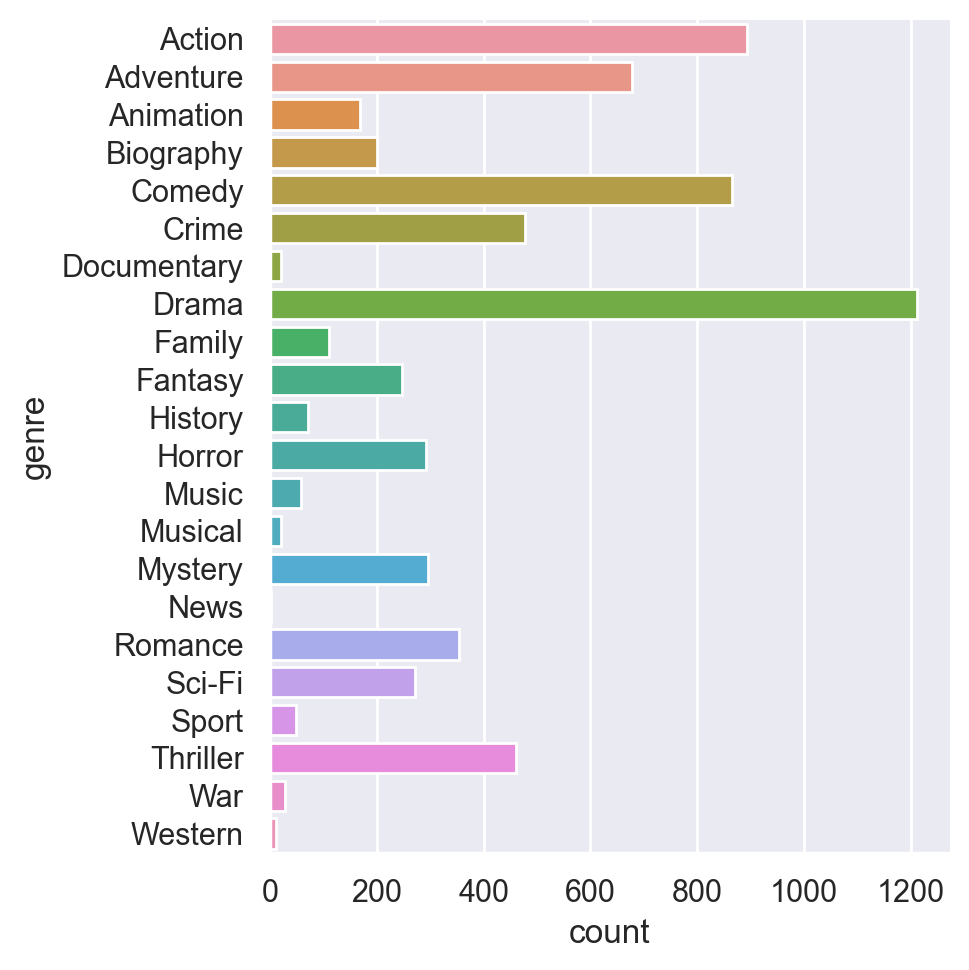

In [34]:
sns.catplot(data = df_genres, y = "genre", kind = "count")

<!--comment -->

It seems that drama is, by far, the genre that most films deal with. Action and comedy follow.

Show the distribution of popularity by genre with a box plot (horizontal). This requires using information from `df_genres` (genre) and `df_movies` (popularity).
 

In [35]:
df_driverpos= pd.merge(df_genres,descarte_df['popularity'], on="movie_id", how = "left")

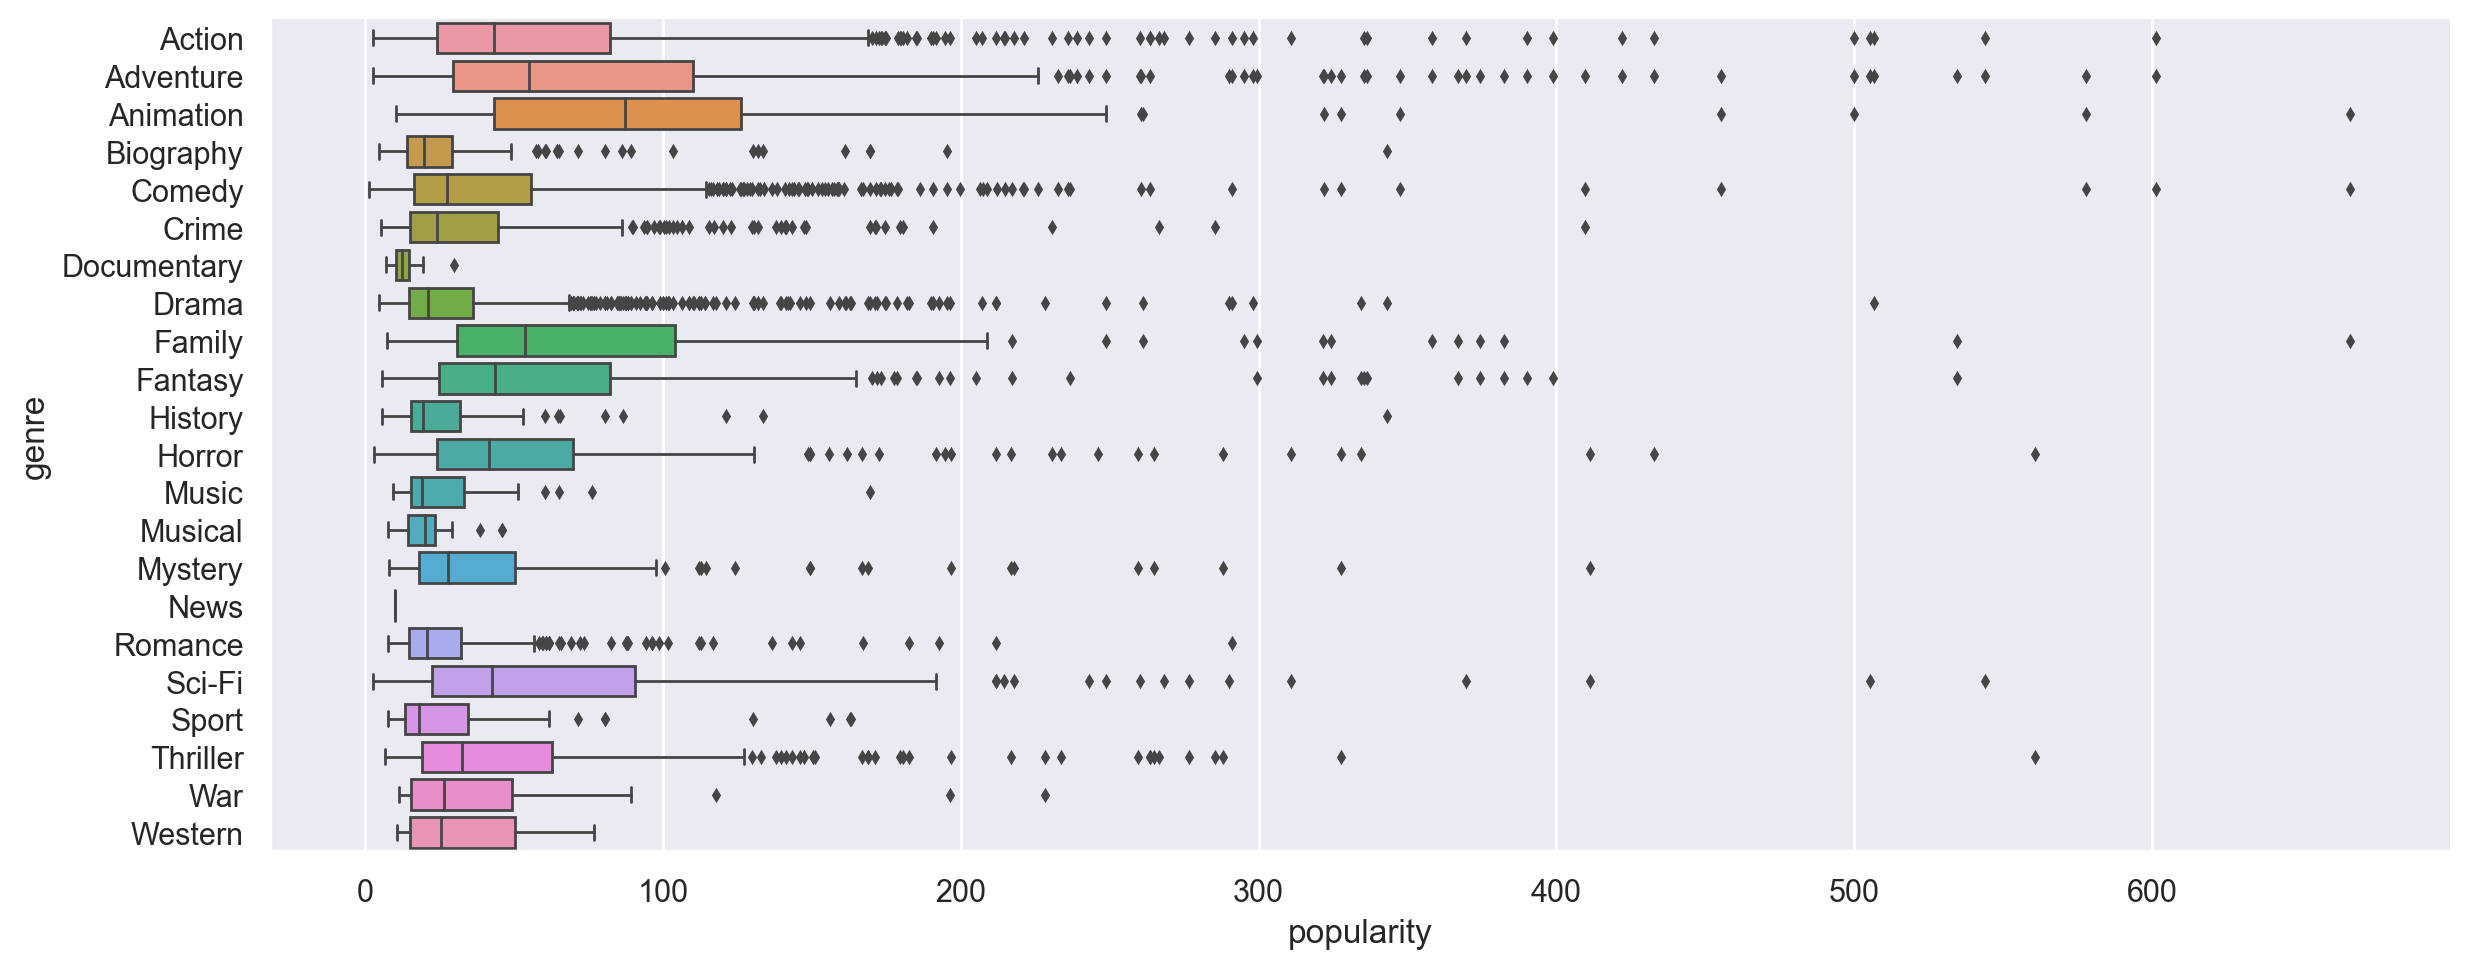

In [36]:
ax = sns.catplot(
    data=pd.merge(df_genres,descarte_df['popularity'], 
                  on="movie_id", how = "left"),
    x='popularity', y='genre', kind='box', aspect = 2.5, linewidth = 1, fliersize = 2.5
)


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 6</font>

To explore the relationship between budgets and income based on gender, because the distributions are skewed, graphs of the type `sns.boxplot()` will also be used. As a previous step, and to facilitate exploration, the genres can be ordered based on the ___median___of the income obtained (`revenue`) by the corresponding films. This order will be stored in the `ordered_genres` list.



In [37]:
ordered_genres = pd.merge(df_genres, df_movies['revenue'], on="movie_id", how = "left").groupby("genre")["revenue"].median().sort_values(ascending=False).to_frame().reset_index()
print(ordered_genres)

          genre      revenue
0     Animation  311594032.0
1     Adventure  237382724.0
2        Family  209113983.5
3        Sci-Fi  155010032.0
4       Musical  152000000.0
5        Action  132537482.5
6       Fantasy  124700000.0
7        Comedy   98268127.5
8         Music   75759862.0
9      Thriller   74549911.0
10       Horror   69493547.0
11          War   68729358.0
12      Romance   68279729.5
13      Mystery   66604309.5
14      History   65616808.0
15      Western   61693168.0
16        Crime   57777106.0
17    Biography   55168294.0
18        Drama   54594779.0
19         News   46243000.0
20        Sport   44907260.0
21  Documentary   23164353.0


<!--comment -->

Draw a box-and-whisker plot with the profit by genre, using the order between genres stored in `ordered_genres`.
 
  

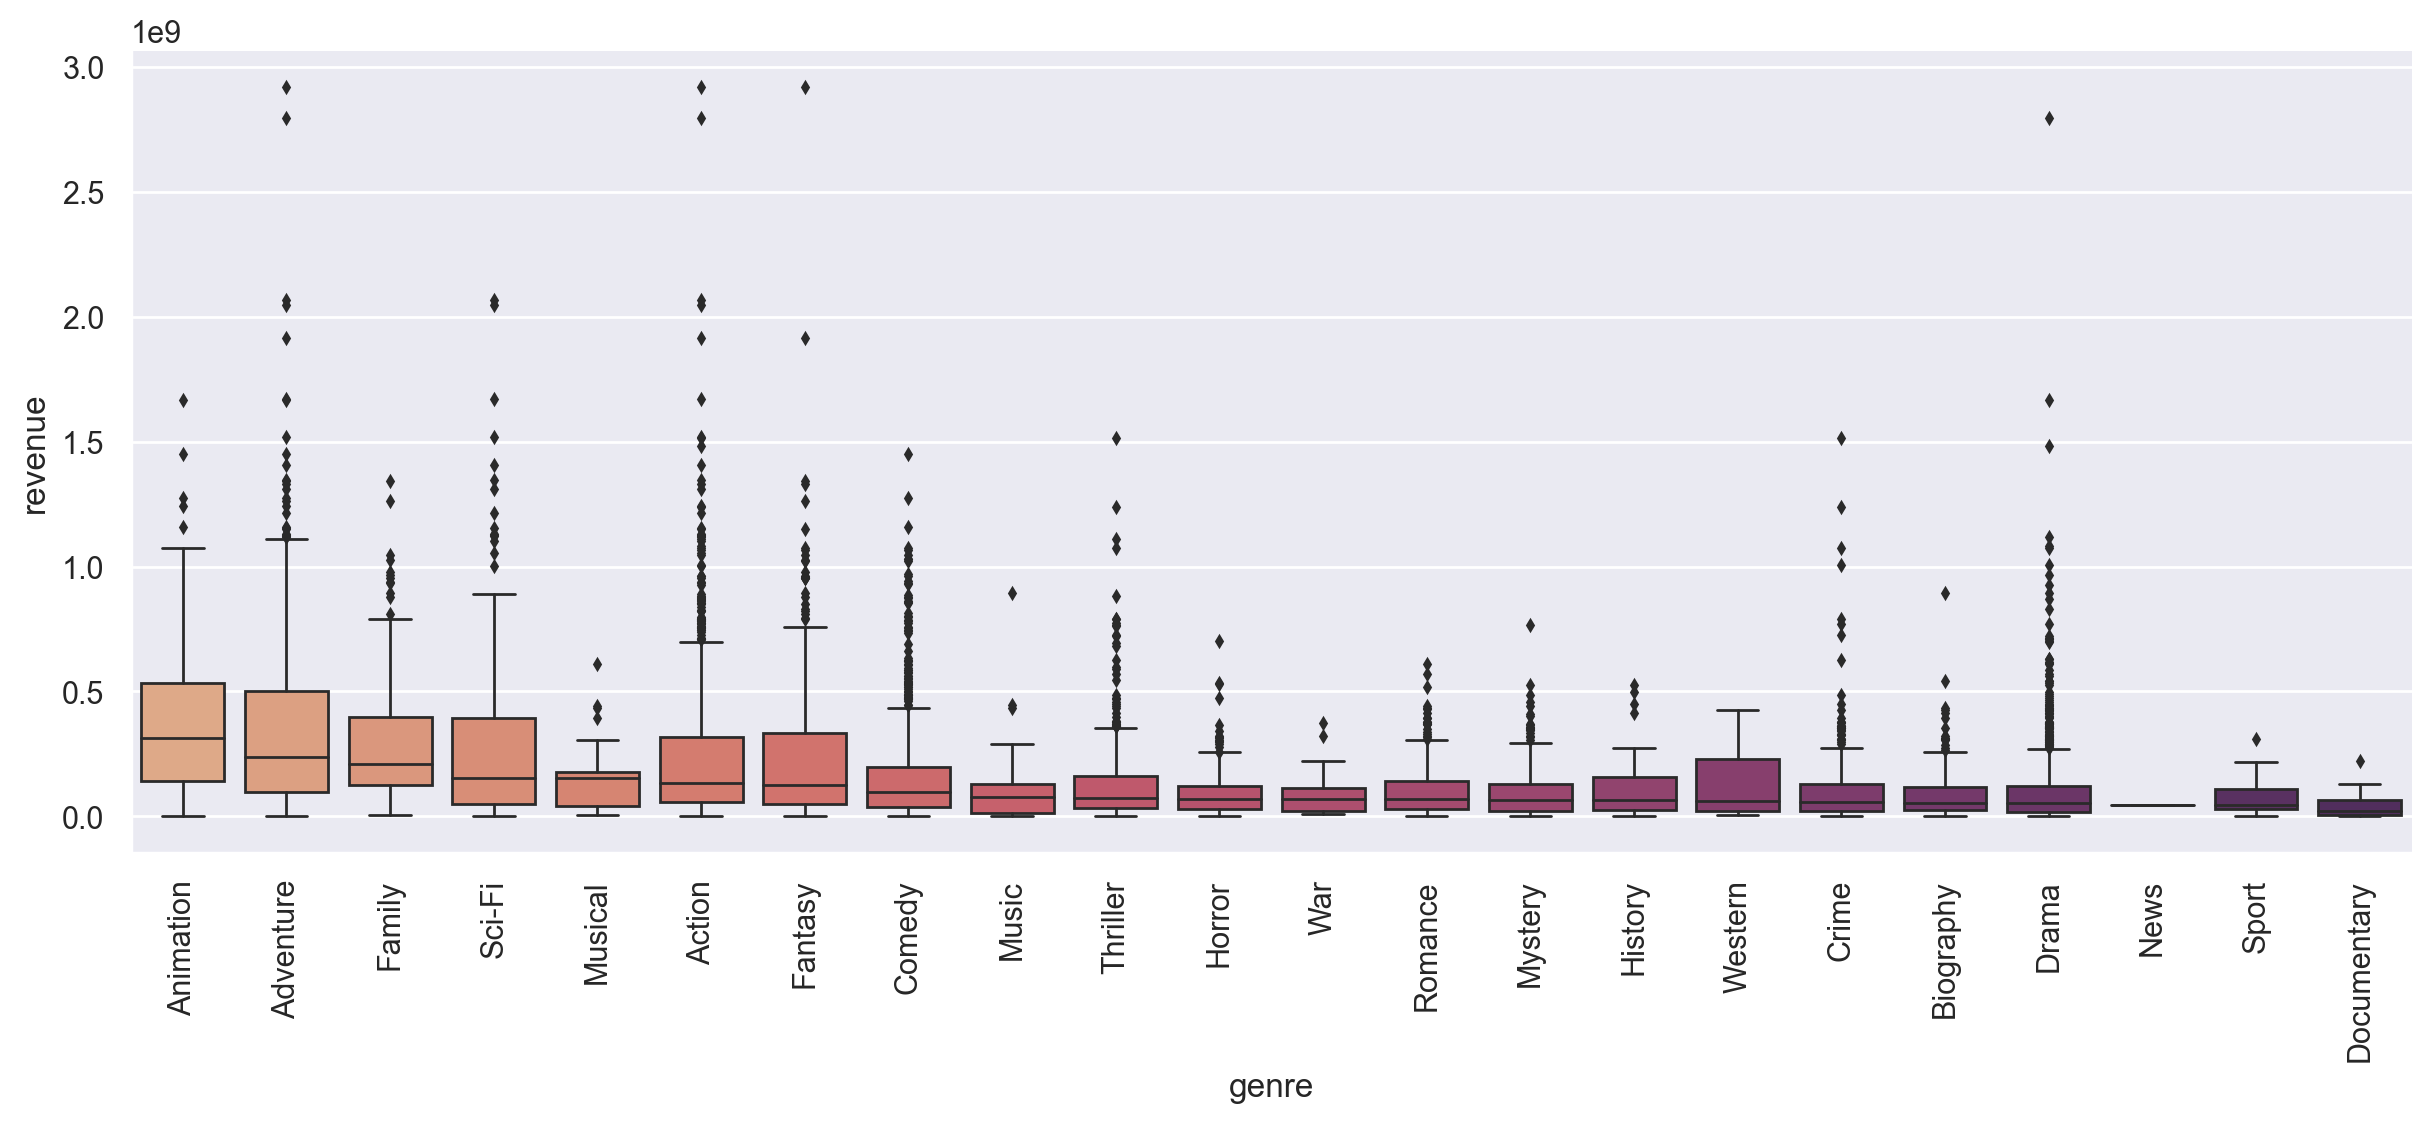

In [38]:
ax = sns.catplot(
    data= pd.merge(df_genres, df_movies['revenue'], on="movie_id", how = "left"),
    x='genre', y='revenue', kind='box', order = ordered_genres["genre"], 
    palette="flare", aspect = 2.5, linewidth = 1, fliersize = 2.5
)
ax.tick_params(axis='x', rotation=90)

<!--comment -->

It can be seen that animation, adventure, family and science fiction films are the genres that gross the most. The least, the news, sports and documentaries. It is curious, although it may be related, that drama is the most frequent genre and is one of the least grossing.
<br>

The importance of the budget in collection was previously proven. Therefore, it is also interesting to study whether the relationship between collections by gender is also reflected in the budgets. Prepare a graph similar to the previous one showing the budget by genre. For comparison, it may be useful to maintain the same order of representation used above (median income).


 

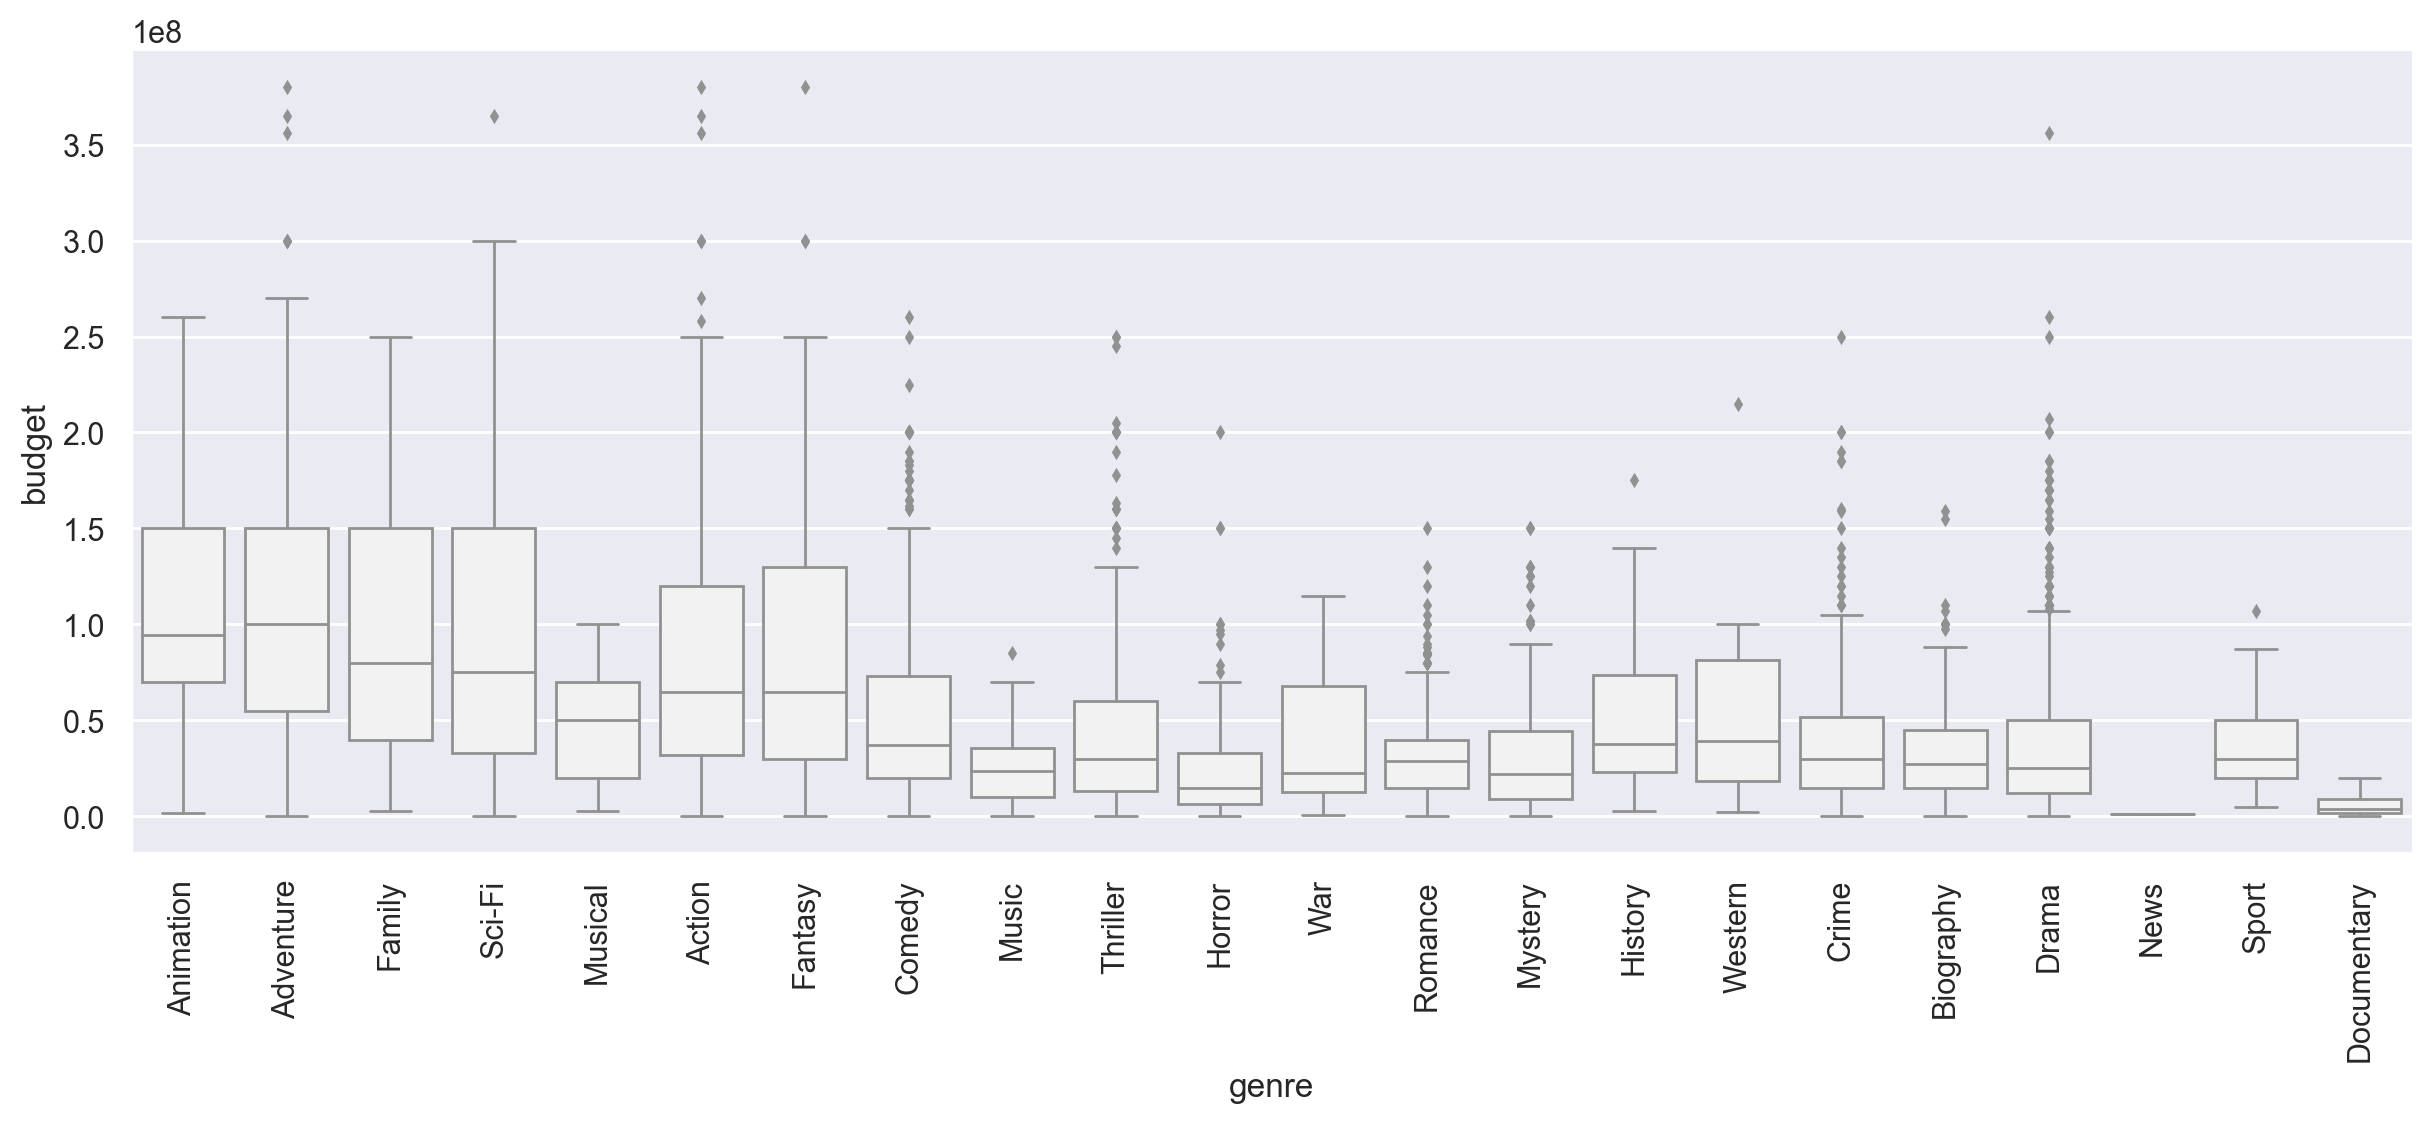

In [39]:
ax = sns.catplot(
    data= pd.merge(df_genres, df_movies['budget'], on="movie_id", how = "left"),
    x='genre', y='budget', kind='box', order = ordered_genres["genre"], 
    color=".95", aspect = 2.5, linewidth = 1, fliersize = 2.5
)
ax.tick_params(axis='x', rotation=90)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

There are some minor changes. However, the general trend is that the genres that produce the most income are also the ones that receive the most budget.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section4"></a>
## <font color="#00586D"> 4. People</font>
<br>

Once the genres have been studied, it will be studied whether the director and the cast have a relationship with the profitability of the films. The _DataFrame_ `df_credits` contains the list of people who participate in each film and in what capacity. On the other hand, the_ DataFrame _`df_ people` contains the information related to each person, including their name.

<a id="section41"></a>
### <font color="#00586D"> 4.1 </font> Directors
<br>

It is interesting to obtain information about the income produced by directors, their popularity and the relationship between both factors.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 7</font>


Make a `sns.jointplot()` plot to check if there is a correlation between the income of films and the popularity of their director. This involves using data from `df_credits`, `df_people[popularity]` and `df_movies['revenue']`) so two mergers must be made. The result of these must be stored in a *DataFrame* called `df_dir_pop_rev`.



In [40]:
df_dir_pop_rev = pd.merge(
    
    df_movies['revenue'], pd.merge(
        
        df_people['popularity'], 
        df_credits[df_credits["rol"]=="director"], 
        on = "people_id", how = "right"),
    
    on = "movie_id", how = "right").dropna()

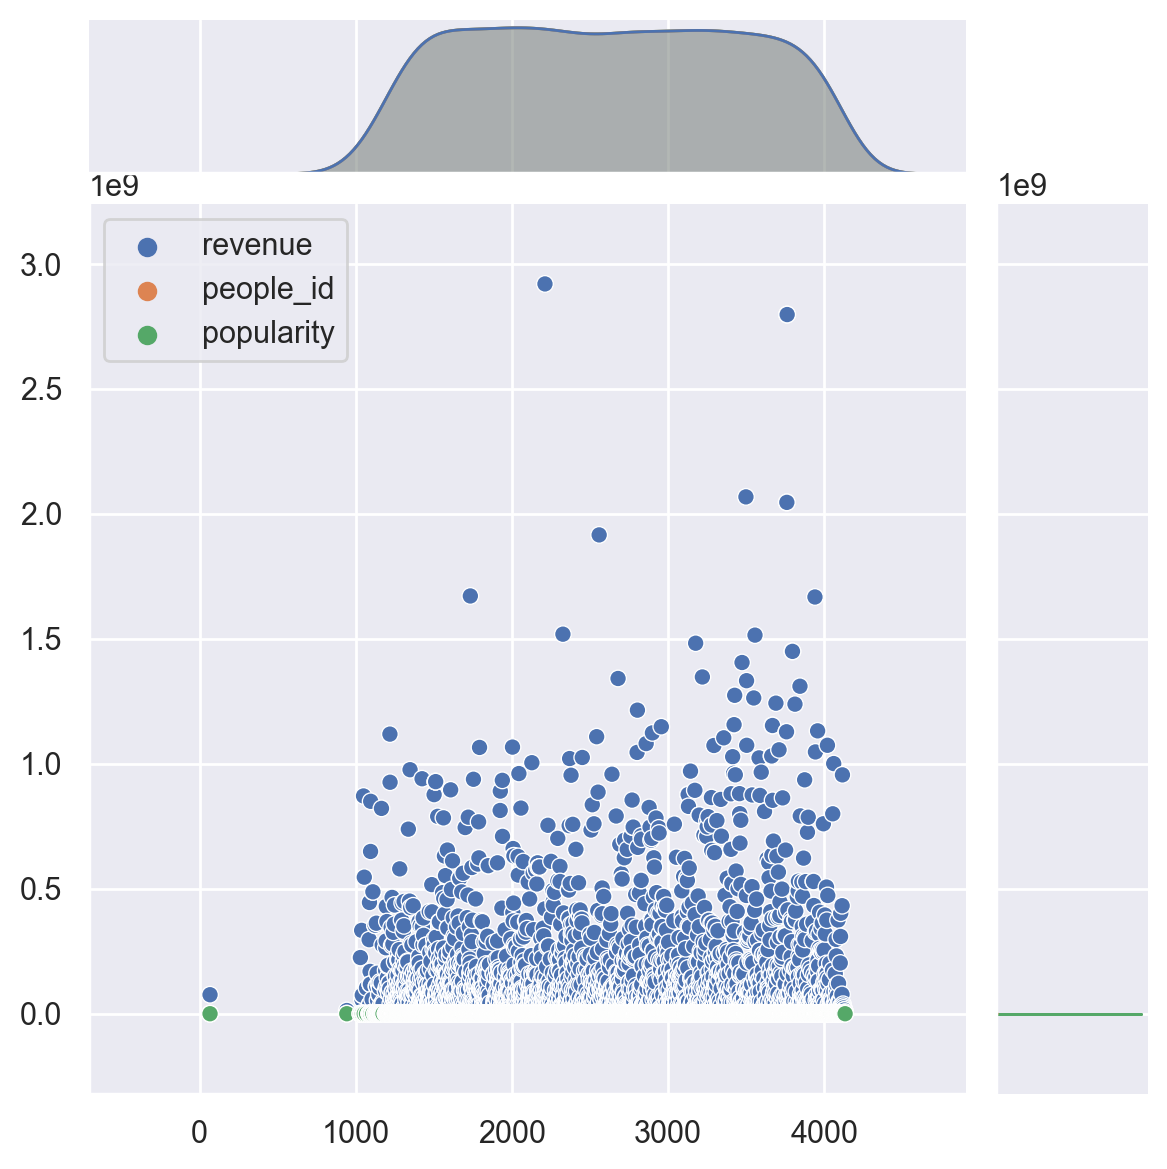

In [41]:
sns.jointplot(df_dir_pop_rev)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

It can be seen that the relationship between the director's popularity and profit is almost zero.

In [42]:
df_dir_pop_rev[['popularity','revenue']].corr()

popularity  revenue
popularity      1.0000   0.1455
revenue         0.1455   1.0000

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section42"></a>
### <font color="#00586D"> 4.2 Distribution</font>
<br>


Once the role of the director has been studied, the casting will be done in the same way.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 8</font>

Create a `sns.jointplot()` graph to check if there is a correlation between the income of the films and the popularity of their cast. The result of these must be stored in a *DataFrame* called `df_cast_pop_rev`.



In [43]:
df_cast_pop_rev = pd.merge(
    
    df_movies['revenue'], pd.merge(
        
        df_people['popularity'], 
        df_credits[df_credits["rol"]=="cast"], 
        on = "people_id", how = "right"),
    
    on = "movie_id", how = "right").dropna()

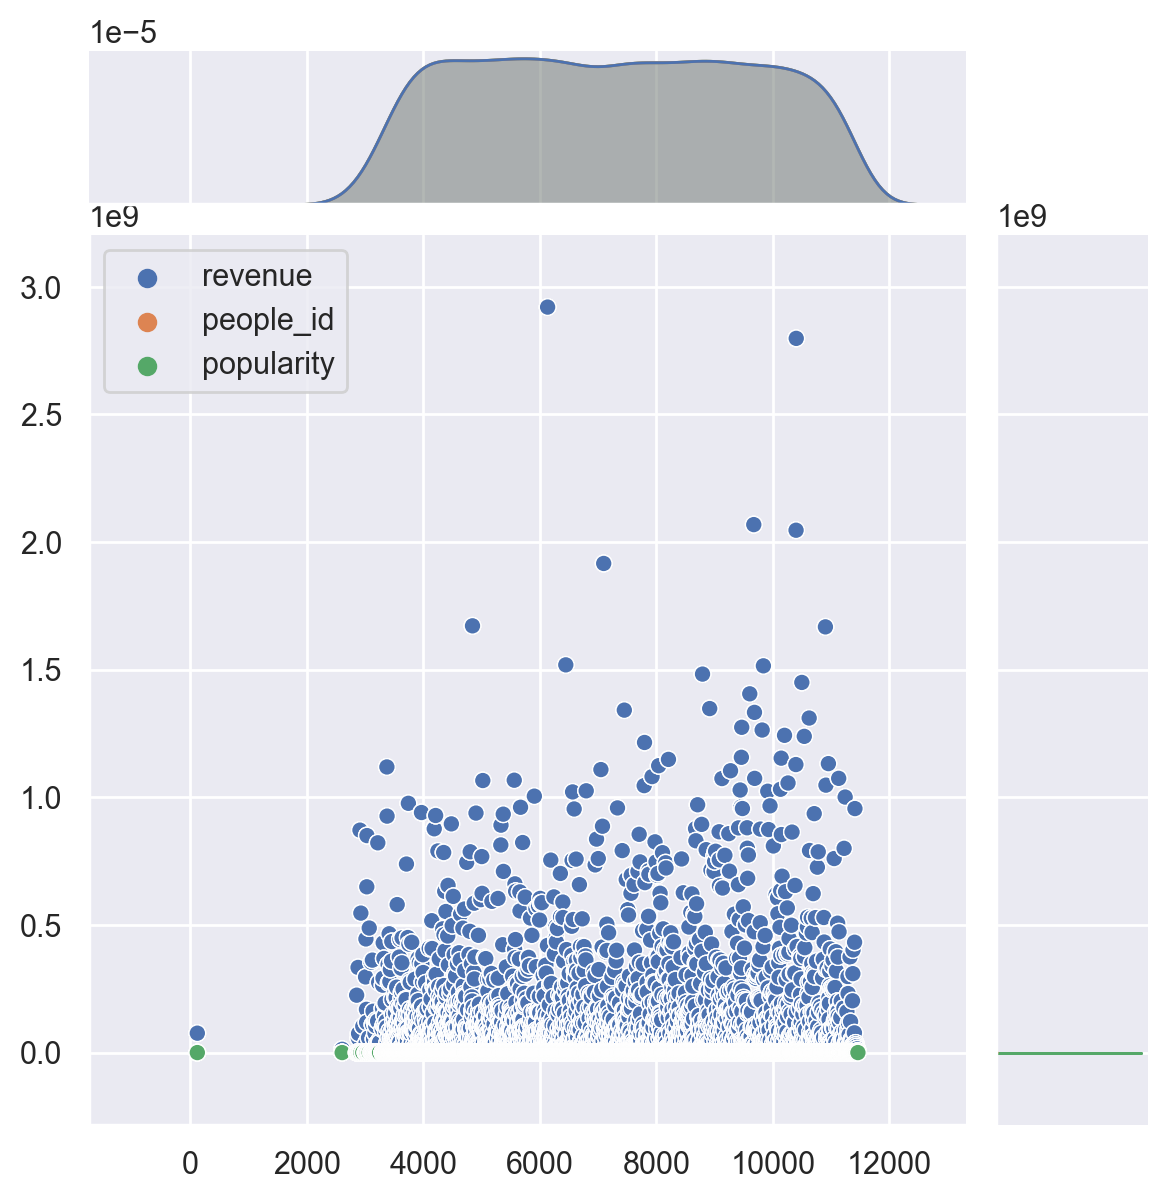

In [44]:
sns.jointplot(df_cast_pop_rev)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

In [45]:
df_cast_pop_rev[['popularity','revenue']].corr()

popularity   revenue
popularity    1.000000  0.151211
revenue       0.151211  1.000000

It is also seen that, although it has a positive influence, it is not decisive because it is almost non-existent.


In short, and as can be seen in the graphs, the main factor in relation to collection is the budget, while others such as the director or the actors are irrelevant (except in very specific cases, it is intuited).


Although the analysis could be deepened, this will be done later taking into account the objective with which the exploration is proposed.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section5"></a>
## <font color="#00586D"> 5. Low budget movies</font>
<br>

In the study objective that has been established initially, the starting point is that there is a limited budget, so the relationship between genre and income will also be studied in this case, considering only those films whose budget is is in the lowest 20%.

The films the study will focus on (post-2000 and low budget) are stored below in `df_movies_low`.

In [46]:
low_budget = df_movies['budget'].quantile(0.20)
df_movies_low = df_movies[df_movies['budget']<low_budget]
len(df_movies_low)

472

Although it is something that can be managed "on the fly", retaining only the movies of interest in `df_genres` makes things easier. In this case they are selected and stored in `df_genres_low`.

In [47]:
df_genres_low = df_genres.loc[df_movies_low.index]

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 9</font>

Recalculate the order of the genres based on the median income and construct a box plot with the data stored in the *DataFrame* `df_movies_low`.



In [48]:
ordered_genres = pd.merge(df_genres_low, df_movies_low['revenue'], on="movie_id", how = "left").groupby("genre")["revenue"].median().sort_values(ascending=False).to_frame().reset_index()
print(ordered_genres)

          genre     revenue
0          News  46243000.0
1       Mystery  44729101.5
2        Horror  44681094.0
3       History  40309095.5
4        Family  40000000.0
5     Biography  36000000.0
6   Documentary  35564473.0
7      Thriller  32117969.5
8       Musical  29385320.0
9         Sport  27610873.0
10    Adventure  23200000.0
11       Comedy  23161122.0
12      Romance  21248625.5
13      Western  20901859.0
14          War  20416563.0
15        Music  19732282.0
16        Drama  19392485.0
17        Crime  17486337.5
18       Sci-Fi  16772676.0
19       Action  15101377.0
20      Fantasy  14191242.5
21    Animation   9419645.0


<!--comment -->

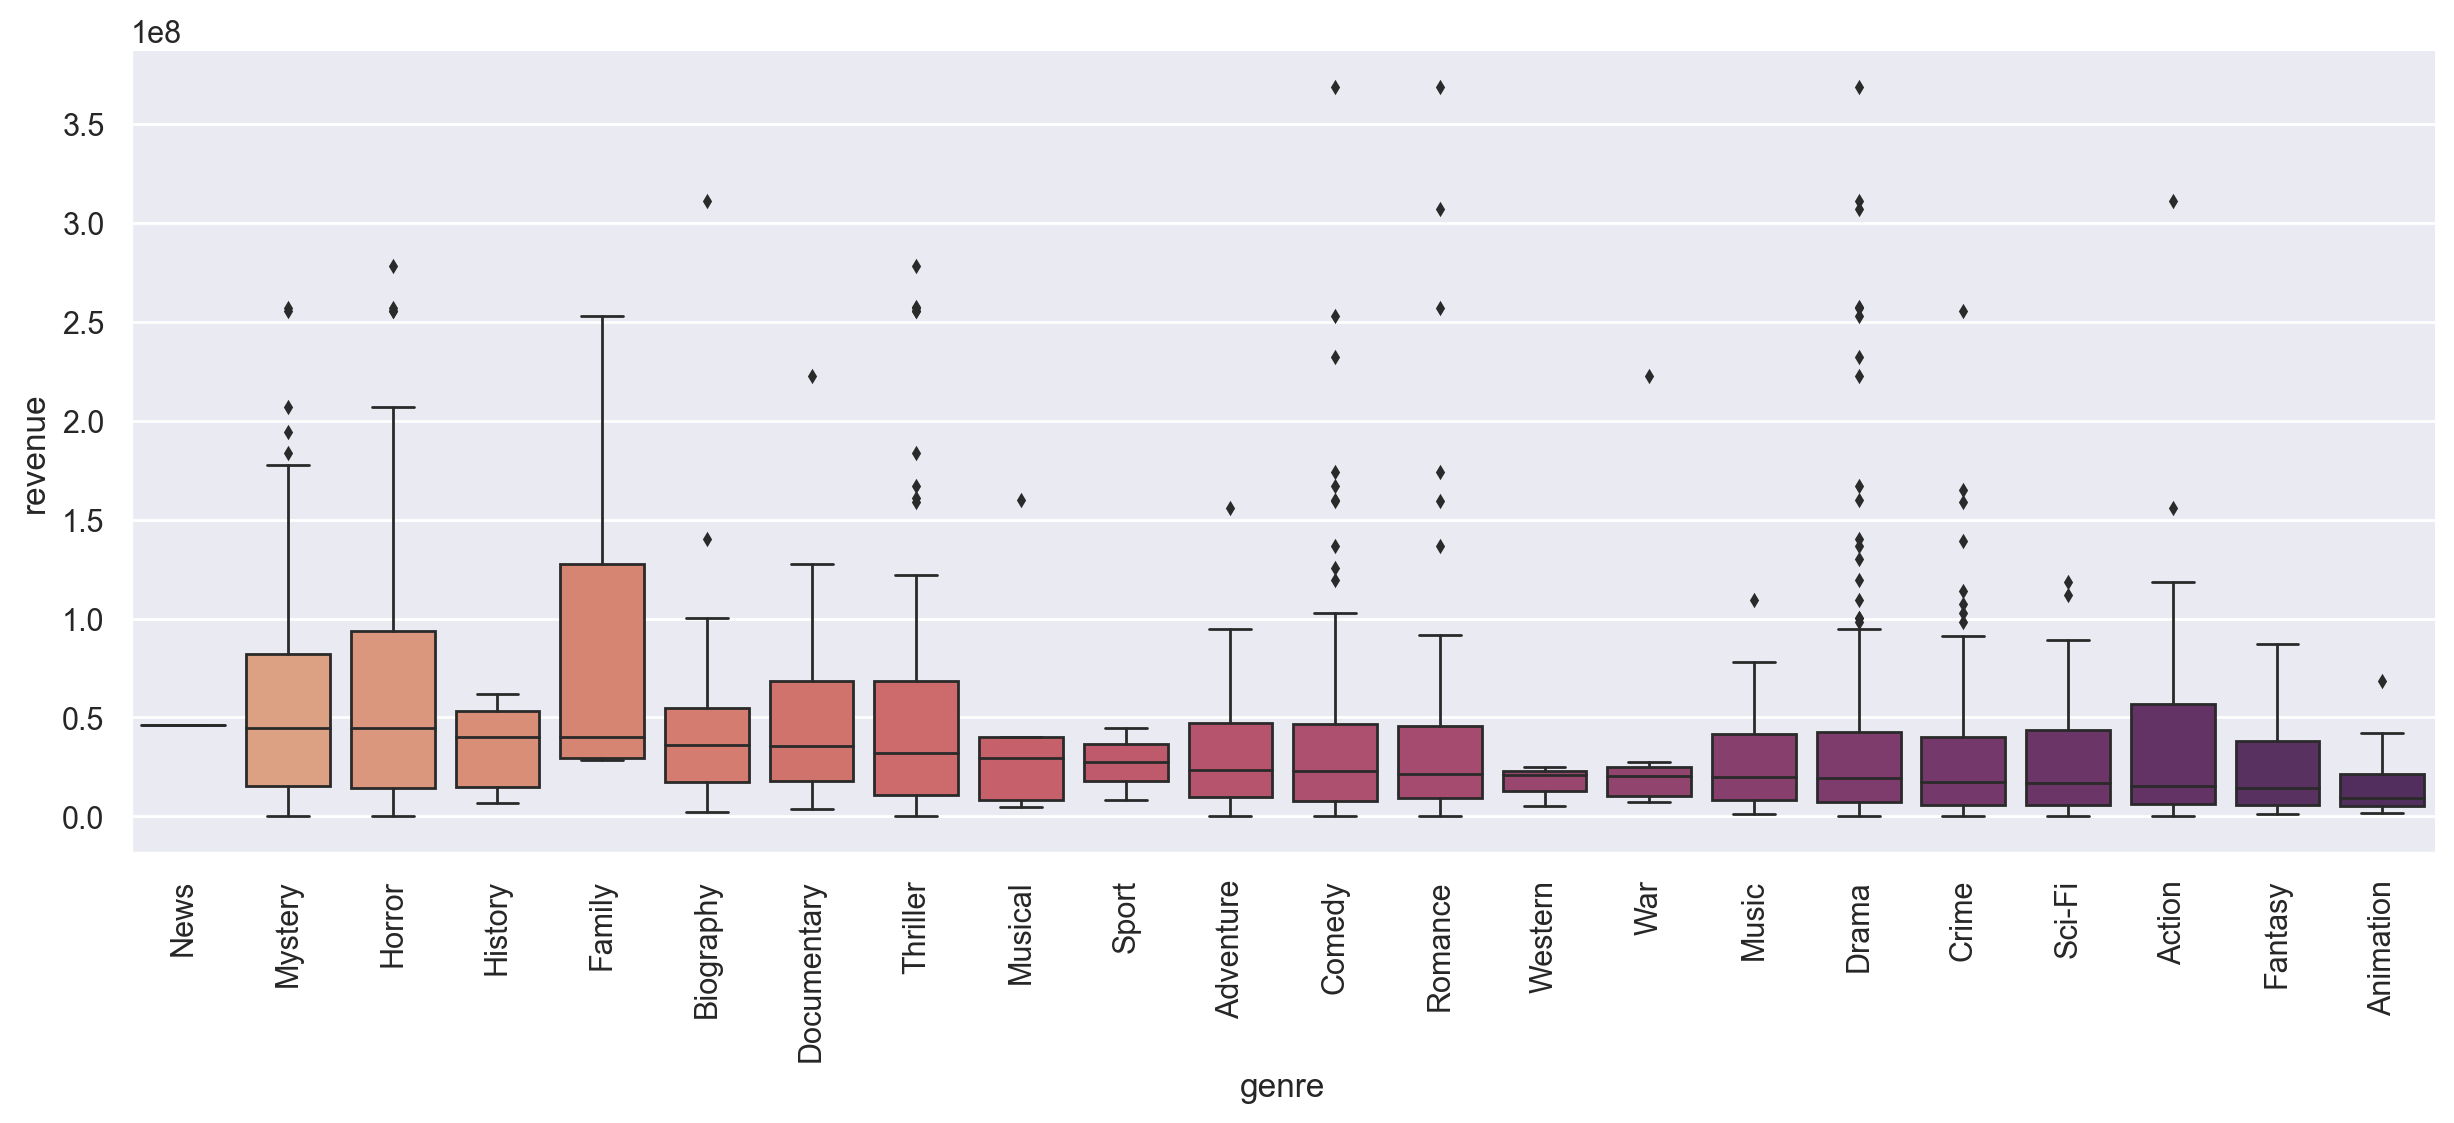

In [49]:
ax = sns.catplot(
    data= pd.merge(df_genres_low, df_movies_low['revenue'], on="movie_id", how = "left"),
    x='genre', y='revenue', kind='box', order = ordered_genres["genre"], 
    palette="flare", aspect = 2.5, linewidth = 1, fliersize = 2.5
)
ax.tick_params(axis='x', rotation=90)

<!--comment -->

A clear change in trend can be seen. When budgets are relatively low, genres such as mystery and horror become more profitable. Also some other genre such as news or history. It is also striking that genres such as animation or fantasy, which are the most profitable in the general case, are not profitable when budgets are low.
<br>

As the most profitable genres are horror and mystery (if the news is discarded, that there is only one film), the films corresponding to these will be selected, in addition to _thriller_ (the latter because it is related and also show some high values) to study them in more depth.

Remove movies from `df_movies_low` that do not correspond to the `Horror`, `Thriller` or `Mystery` genres.
 
 
 

In [50]:
df_movies_low = pd.merge(
    
    df_movies_low, 
    
    df_genres_low[(
        df_genres_low["genre"].isin(["Horror","Thriller","Mistery"])
    )],
    
    on = "movie_id"
)

df_movies_low.head()

title  avg_rating  num_votes      budget   revenue  \
movie_id                                                                  
tt0144084  American Psycho         7.6     611514   7000000.0  34266564   
tt0181984      Boiler Room         7.0      53663   7000000.0  28780255   
tt0209144          Memento         8.4    1232381   9000000.0  39723096   
tt0211443          Jason X         4.4      57313  11000000.0  16951798   
tt0219699         The Gift         6.7      69992  10000000.0  12008642   

           popularity release_date     genre  
movie_id                                      
tt0144084      85.933   2000-04-13    Horror  
tt0181984      17.792   2000-02-18  Thriller  
tt0209144      32.570   2000-10-11  Thriller  
tt0211443      47.684   2001-11-09    Horror  
tt0219699      31.863   2000-03-16    Horror

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Once the set of films has been reduced to those that are of interest for the proposed context, the list of directors and actors linked to higher grossing will be obtained.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 10</font>

Create a *DataFrame* named `best_directors_low` with the data (`people_id`, `revenue`, `name`, `popularity` and `gender`) of the ten directors for whom the average grossing of their films is higher.




In [51]:


best_directors_low = pd.merge(
    
    pd.merge(
        df_credits[df_credits["rol"]=="director"],
        df_movies_low['revenue'], on = "movie_id", how = "right"
    ).groupby("people_id")["revenue"].mean().nlargest(10), 
    
    df_people.drop(columns = "imdb_id"),
    
    on = "people_id", how = "left"

)

In [52]:
best_directors_low

revenue                name  popularity  gender
people_id                                                     
26714      257047661.0    John R. Leonetti       3.716       2
64141      255614941.0  David Gordon Green      12.051       2
291263     255407969.0        Jordan Peele      12.006       2
90591      194183034.0           Oren Peli       1.177       2
11614      188452210.0  M. Night Shyamalan      12.368       2
20310      183474602.0     Takashi Shimizu       3.617       2
20133      177512032.0        Tod Williams       1.658       2
142272     174928918.0         Henry Joost       1.522       2
142276     174928918.0      Ariel Schulman       3.156       2
21684      173040709.5        Bong Joon-ho      12.510       2

<!--comment -->

Create a (horizontal) bar chart with the `revenue` values ​​for each director in `best_directors_low`.

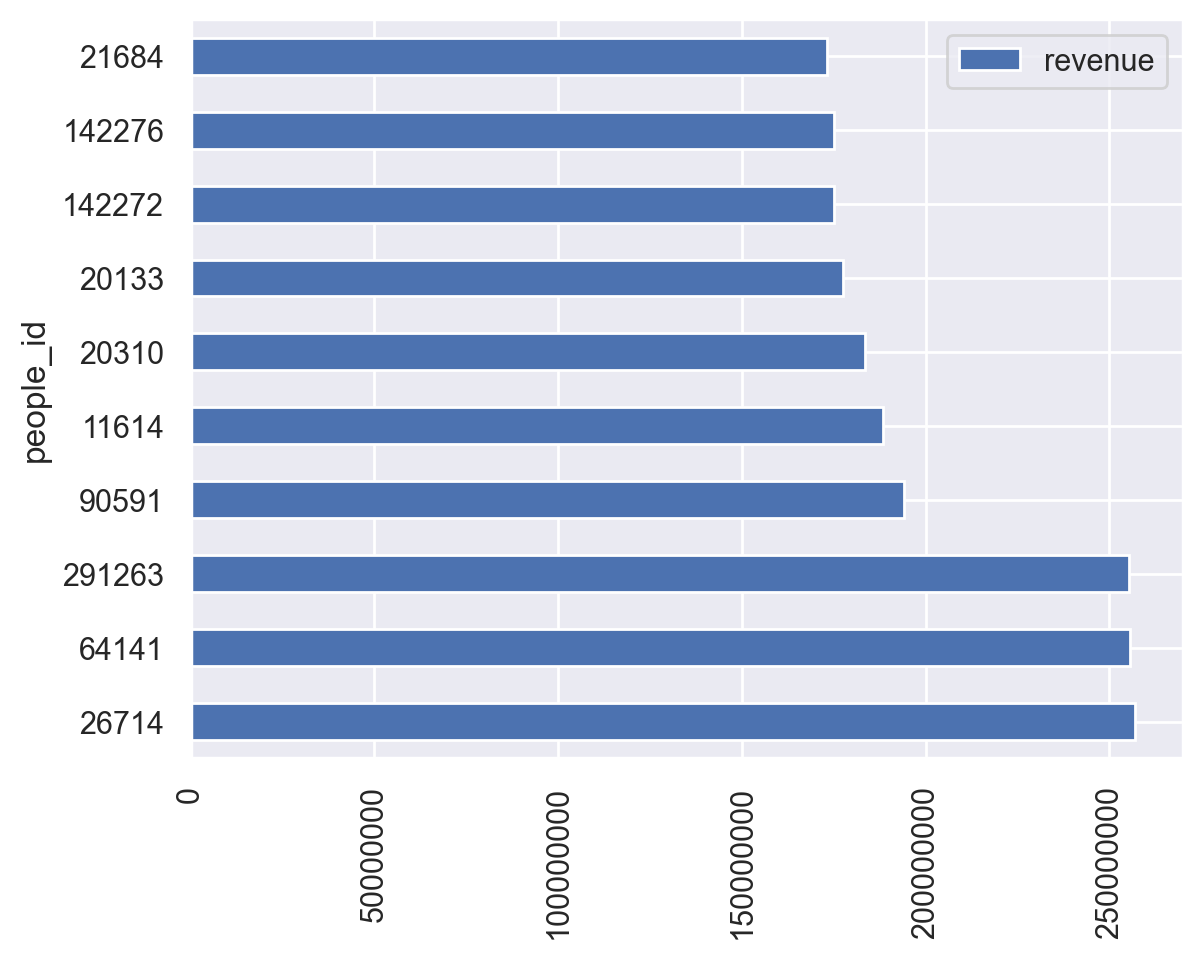

In [53]:
ax = best_directors_low.reset_index().plot.barh("people_id", "revenue")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.tick_params(axis='x', rotation=90)

<!--comment -->

Below is the film from the highest-grossing director who, it turns out, is also the star of the film.

In [54]:
# people_id del director
best_director_id = best_directors_low.iloc[0].name
# Créditos de las películas de ese director y que estén en df_movies_low
movies_bd = (df_credits[(df_credits['people_id']==best_director_id) & 
                       (df_credits['movie_id'].isin(df_movies_low.index))]
                       ['movie_id'])
# Películas
df_movies.loc[movies_bd]

title  avg_rating  num_votes     budget    revenue  popularity  \
movie_id                                                                        
tt3322940  Annabelle         5.4     160448  6500000.0  257047661      85.045   

          release_date  
movie_id                
tt3322940   2014-10-02

We can show the poster of the film that has catapulted this director to success (at least financially).

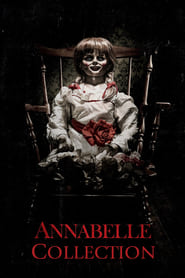

In [55]:
from IPython.display import Image

Image('http://image.tmdb.org/t/p/w185//8ouiyGYcv3E1JPrPrC7pLjxlDhC.jpg')

A perhaps fairer way to calculate the profitability of a film is the `revenue`/`budget` ratio (to obtain this data, it is necessary to consider only the films with `revenue>0` and `budget>0`, but first section those that did not meet the condition were eliminated). Obtain the 10 directors who have generated the greatest profit according to this criterion.

  
Show a graph, similar to the previous one, with this information. Instead of using `revenue`, you must first calculate a new column, called `rent` with the profit/budget, and display the data corresponding to this new column.

 

In [56]:
df_movies_low['rent'] = df_movies_low["revenue"] / df_movies_low["budget"]

In [57]:
pd.merge(
        df_credits[df_credits["rol"]=="director"],
        df_movies_low['rent'], on = "movie_id", how = "right"
    ).groupby("people_id")["rent"].mean().nlargest(10)

people_id
90591      903.176902
640        420.522723
76624       77.919429
1932296     75.462037
86688       62.882090
2127        61.155275
20133       59.170677
291263      56.757326
26714       39.545794
999812      38.390020
Name: rent, dtype: float64

In [58]:
# Completar

best_directors_low = pd.merge(
    
    pd.merge(
        df_credits[df_credits["rol"]=="director"],
        df_movies_low['rent'], on = "movie_id", how = "right"
    ).groupby("people_id")["rent"].mean().nlargest(10), 
    
    df_people.drop(columns = "imdb_id"),
    
    on = "people_id", how = "left"

)

In [59]:
best_directors_low

rent              name  popularity  gender
people_id                                                  
90591      903.176902         Oren Peli       1.177       2
640        420.522723      Chris Kentis       1.400       2
76624       77.919429     Shane Carruth       0.840       2
1932296     75.462037   Aneesh Chaganty       0.828       2
86688       62.882090   Levan Gabriadze       1.400       2
2127        61.155275         James Wan      14.339       2
20133       59.170677      Tod Williams       1.658       2
291263      56.757326      Jordan Peele      12.006       2
26714       39.545794  John R. Leonetti       3.716       2
999812      38.390020    Bradley Parker       1.663       2

<!--comment -->

Create a (horizontal) bar chart with the `rent` values ​​for each director in `best_directors_low`.

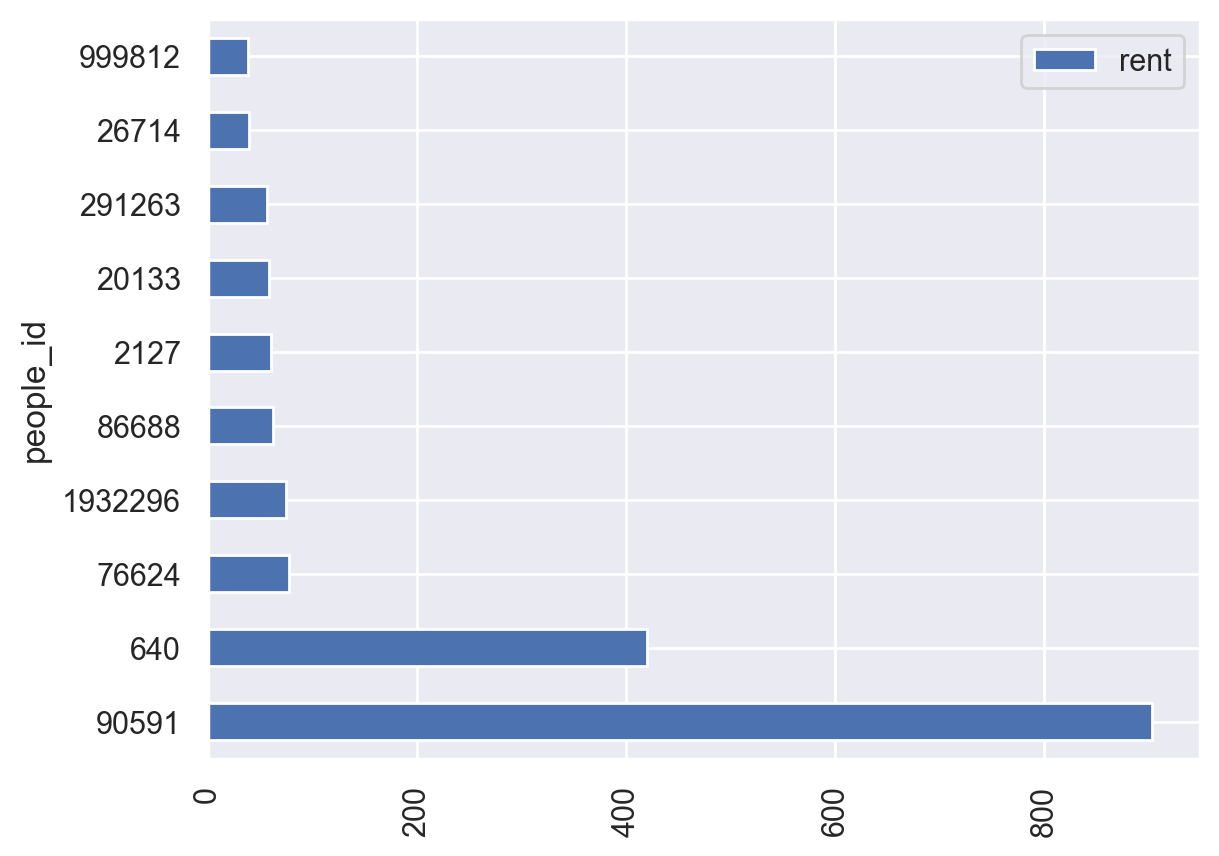

In [60]:
# Completar
ax = best_directors_low.reset_index().plot.barh("people_id", "rent")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.tick_params(axis='x', rotation=90)

<!--comment -->

In this sense, there is a director and film that stands out far above the rest.

title  avg_rating  num_votes    budget    revenue  \
movie_id                                                                     
tt1179904  Paranormal Activity         6.3     241286  215000.0  194183034   

           popularity release_date  
movie_id                            
tt1179904      89.234   2007-09-14

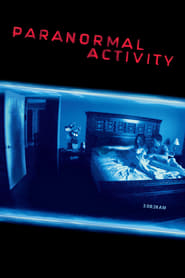

In [61]:
# people_id del director
best_director_id = best_directors_low.iloc[0].name
# Créditos de las películas de ese director y que estén en df_movies_low
movies_bd = (df_credits[(df_credits['people_id']==best_director_id) & 
                       (df_credits['movie_id'].isin(df_movies_low.index))]
                       ['movie_id'])
# Películas
display(df_movies.loc[movies_bd])

Image('http://image.tmdb.org/t/p/w185/1bjA7de4O0NhMsaOqwvrecophUs.jpg')

Once we have studied the directors, we will proceed to study the cast. In this case, we will start with which actors or actresses participate in films with the most income.


 Obtain the names of the 20 actors/actresses whose films generate, on average, the most income. Store the result in a *DataFrame* named `best_cast_low`.
 
 
  

In [62]:
# Completar

best_cast_low = pd.merge(
    
    pd.merge(
        df_credits[df_credits["rol"]=="cast"],
        df_movies_low['revenue'], on = "movie_id", how = "right"
    ).groupby("people_id")["revenue"].mean().nlargest(20), 
    
    df_people.drop(columns = "imdb_id"),
    
    on = "people_id", how = "left"

)

In [63]:
best_cast_low

revenue                   name  popularity  gender
people_id                                                        
5530       278454358.0           James McAvoy      36.130       2
52462      278454358.0          Betty Buckley       4.241       1
115290     257591776.0           Lee Sun-kyun       7.180       2
556435     257591776.0          Cho Yeo-jeong      14.593       1
34842      257047661.0          Tony Amendola       5.333       2
82809      257047661.0       Annabelle Wallis      34.983       1
94436      257047661.0            Ward Horton       5.232       2
8944       255614941.0       Jamie Lee Curtis      21.423       1
20750      255614941.0             Judy Greer      29.080       1
1511997    255614941.0          Andi Matichak      12.880       1
2229       255407969.0       Catherine Keener      16.190       1
206919     255407969.0         Daniel Kaluuya      14.460       2
1255540    255407969.0       Allison Williams      10.818       1
176748     207039844.0         Lauren Bittner       4.090       1
1397778    199110887.0        Anya Taylor-Joy      49.950       1
90597      194183034.0            Micah Sloat       1.731       2
90598      194183034.0         Mark Fredrichs       1.400       2
118243     192275938.0        Sprague Grayden       7.440       1
11863      183474602.0  Sarah Michelle Gellar      13.653       1
15338      183474602.0       William Mapother      10.038       2

<!--comment -->

Create a (horizontal) bar chart with the `revenue` values ​​for each director in `best_cast_low`.

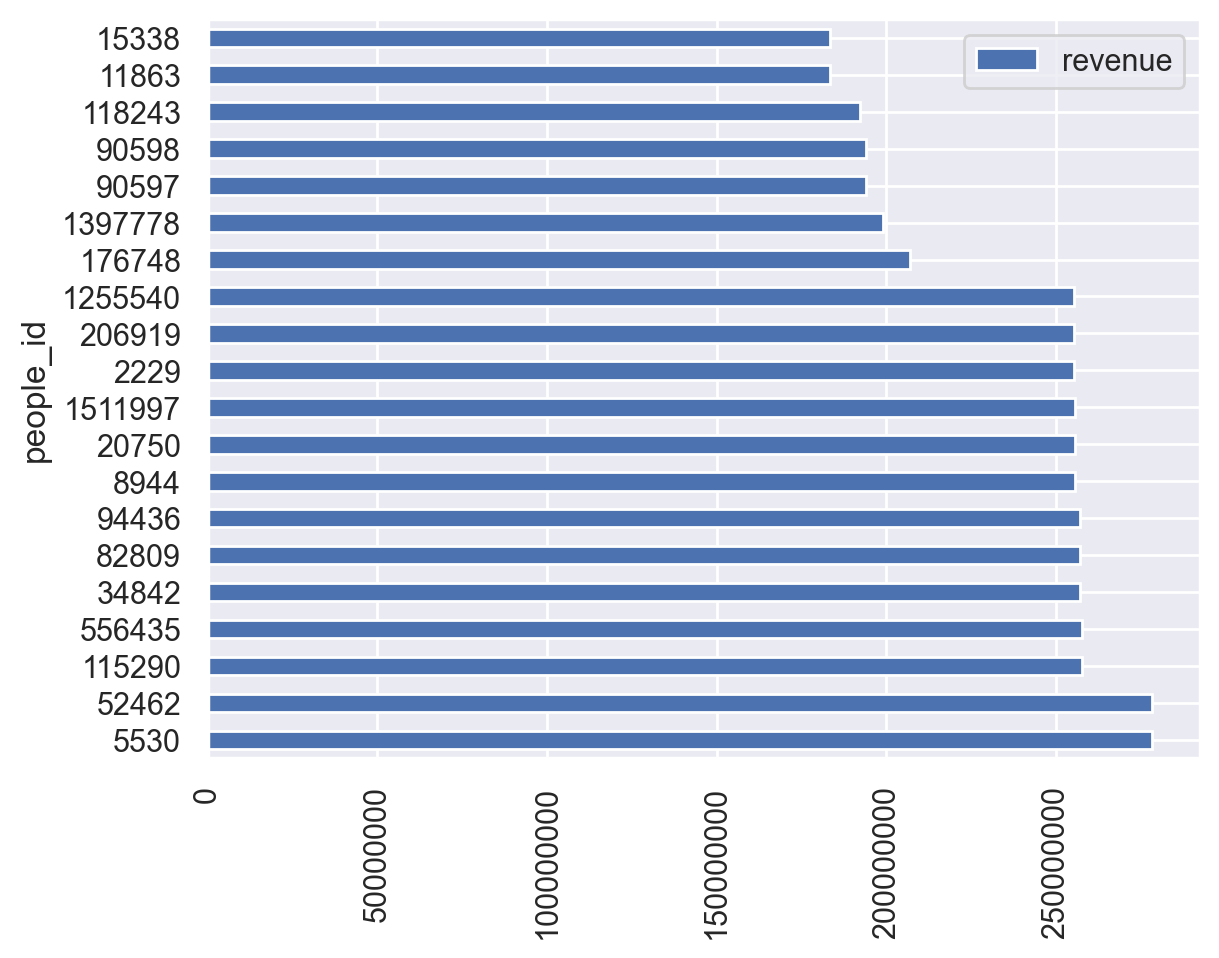

In [64]:
# Completar
ax = best_cast_low.reset_index().plot.barh("people_id", "revenue")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.tick_params(axis='x', rotation=90)

<!--comment -->

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

The previous exercise shows a more or less equitable distribution between actors and actresses for the 10 cast members who are linked to the greatest benefit. However, this factor (gender) will be studied more.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 11</font>

Create a *DataFrame* called `cast_low`, similar to the previous one, with the average profit (`revenue`) associated with each actor, their name (`name`), popularity (`popularity`) and gender (` gender`).




In [65]:
cast_low = pd.merge(
    
    pd.merge(
        df_credits[df_credits["rol"]=="cast"],
        df_movies_low['revenue'], on = "movie_id", how = "right"
    ).groupby("people_id")["revenue"].mean(), 
    
    df_people.drop(columns = "imdb_id"),
    
    on = "people_id", how = "left"

)
cast_low

revenue                name  popularity  gender
people_id                                                     
34         118587880.0  Mykelti Williamson      14.914       2
49         148868835.0         Maria Bello      20.875       1
63          47709193.0      Milla Jovovich      28.979       1
100         82391145.0      Scott Speedman      20.602       2
112         12008642.0      Cate Blanchett      18.590       1
...                ...                 ...         ...     ...
2037046      1088907.0     Souheila Yacoub       3.065       1
2041838      1088907.0   Romain Guillermic       0.602       2
2048372     51749995.0       Diana Silvers      13.341       1
2309944     18123239.0    Valeriia Karaman       1.980       1
2396546     53785551.0       Madelyn Grace       7.609       1

[484 rows x 4 columns]

<!--comment -->

From the *DataFrame* `cast_low`, obtain a bar graph showing the number of actors of each gender.

Text(0, 0.5, 'Quantity')

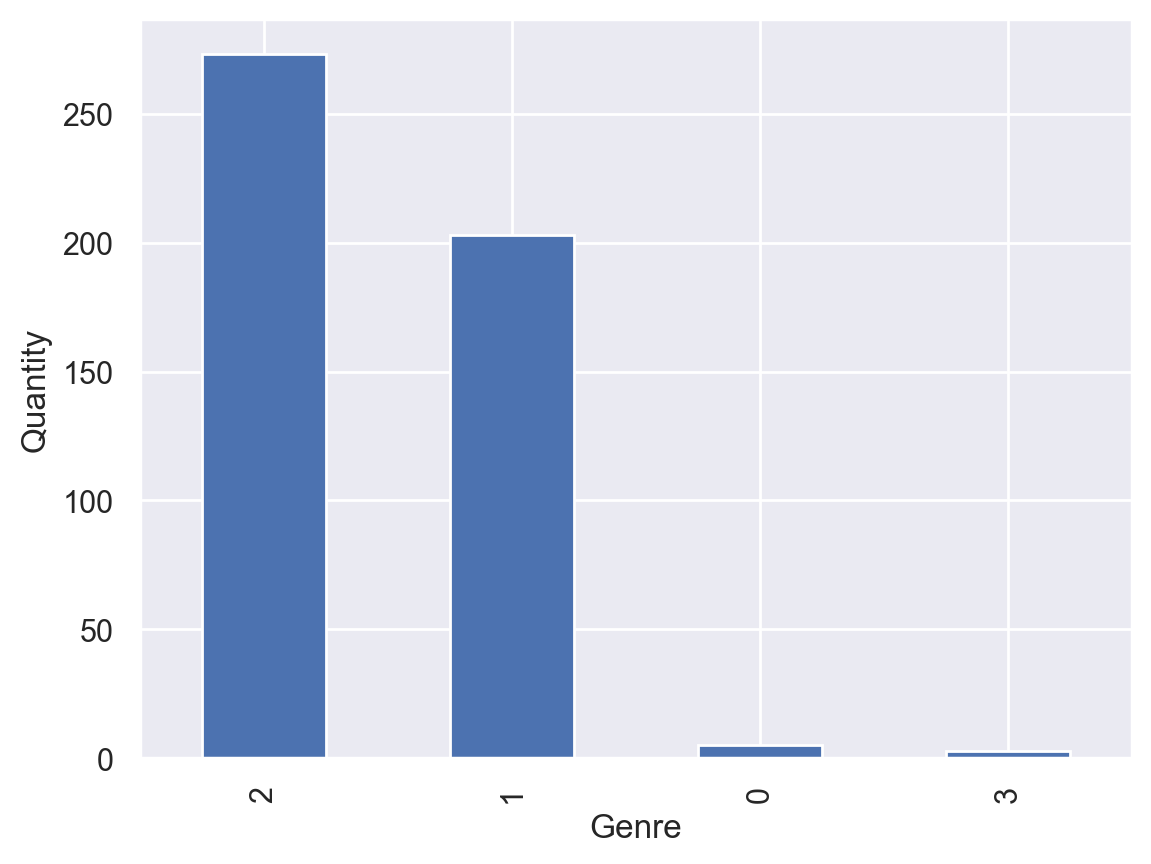

In [66]:
ax = cast_low["gender"].value_counts().plot.bar()
plt.xlabel('Genre')
plt.ylabel('Quantity')

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

It can be seen that the number of actors is greater than the number of actresses. It is worth wondering if there is any type of difference in the collection linked to the gender of the actors.

#### <font  color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 12</font>

Show the distribution of `cast_low` for genders 1 (female) and 2 (male).

 

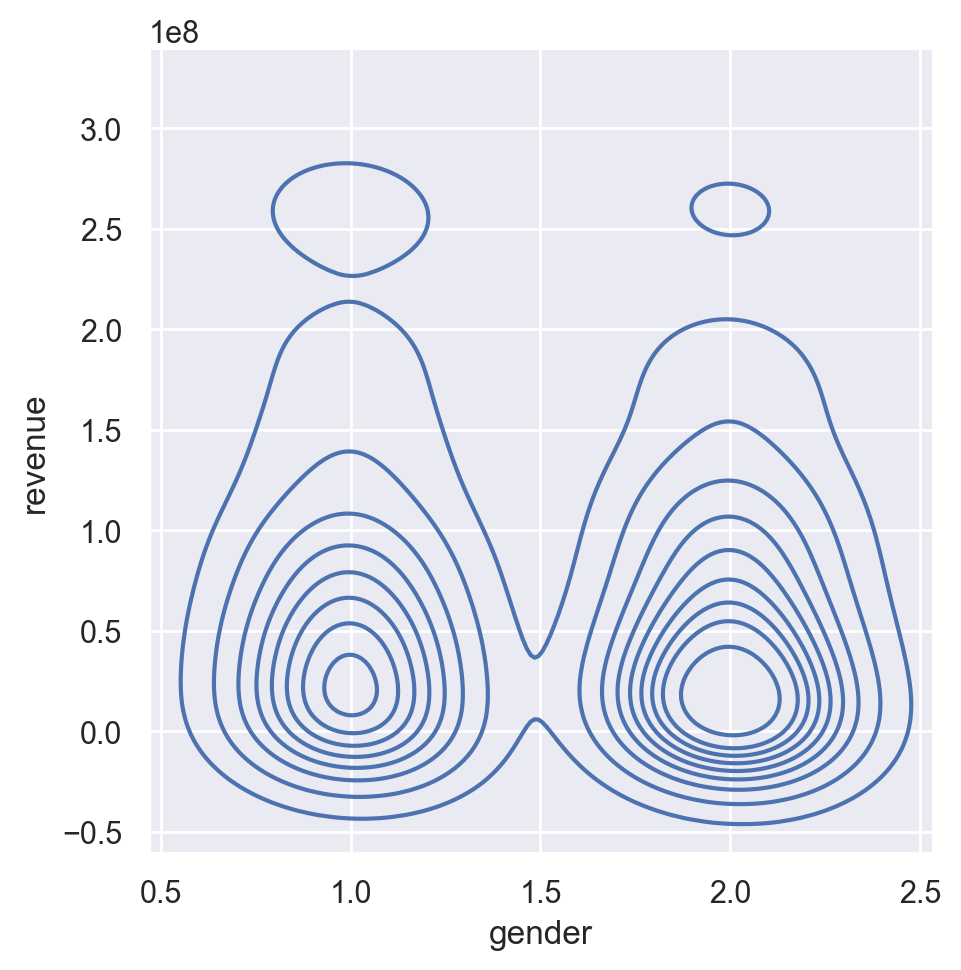

In [67]:
sns.displot(data = cast_low[cast_low["gender"].isin([1,2])], x = "gender", y = "revenue", kind = "kde")

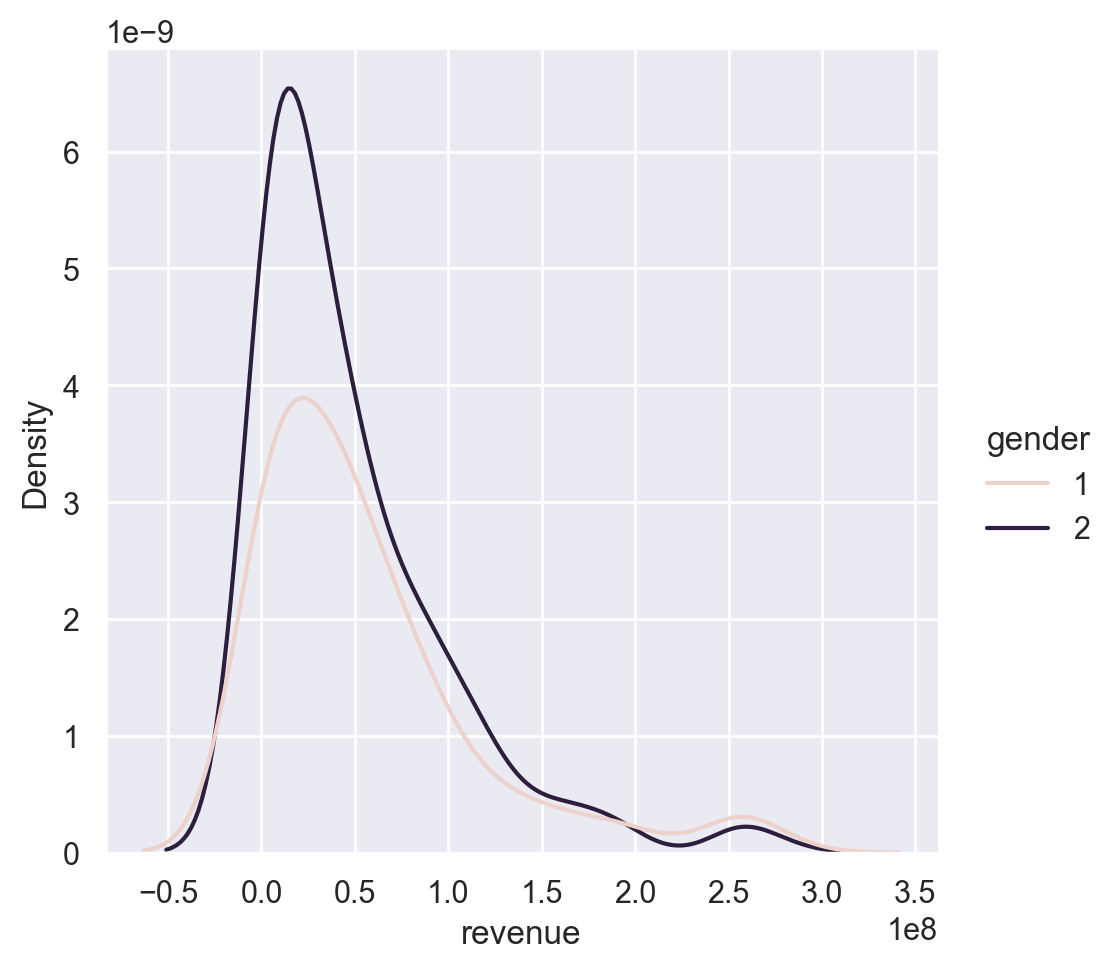

In [68]:
sns.displot(data = cast_low[cast_low["gender"].isin([1,2])], x = "revenue", hue = "gender", kind = "kde")

<!--comment -->

In principle, there is some difference in the distributions, but it is not clear that there is a difference in the average collection. This fact can be verified using a Mann-Whitney U test. If we set a significance level of 95%, can we say that the average salaries are equal?

In [69]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(cast_low.loc[cast_low['gender']==1,'revenue'], cast_low.loc[cast_low['gender']==2,'revenue'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=29488.000, p=0.231


Null hypothesis (H0): There is no difference in the average collection between men and women
<br>
Alternative hypothesis (H1): There is a difference in the average collection between men and women
<br>
Since the p-value is not less than 0.05, the null hypothesis that establishes that there is no difference in the average collection is not ruled out, so it could be stated that the average salaries are equal.


<br><br><br>

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

It is perceived that, despite the fact that more actors appear than actresses, it seems that in the films with the highest profits there is no difference or even more actresses appear than actors. The test reflects that in general there are no differences in the collections of the films in which both participate.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section6"></a>
## <font color="#00586D"> 6. Conclusion</font>
<br>

This work was based on two databases of films and people, and the objective was to study which factors are most related to the success of a film, which is measured by the income it generates. From the beginning, it has been clear that the budget is the most important factor, that the genres in which the most money is spent in production are animation, fantasy, etc., and that these are also the ones that obtain the most revenue. It has also been proven that information regarding the popularity of directors and actors __not__ seems to be a very relevant factor.
<br>

However, the study has been limited to the current period and the (relatively low) available budget. In that sense, it has been proven that the most profitable films are those that belong to the horror, thriller, etc. genres. Movies like "Paranormal Activity" have also been found to generate extraordinarily high returns in proportion to the investment.
<br>

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>